<a href="https://colab.research.google.com/github/Lafri-13/Analysing-Tropospheric-Formaldehyde-HCHO-gas-in-Sri-Lanka/blob/main/Analysis_HCHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries and Datasets

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df_col_mat_nuw = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/col_mat_nuw_output.csv')
df_kan = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/kan_output.csv')
df_mon_kur_jaf = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/mon_kur_jaf_output.csv')
external_df = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/ext_data.csv')

# **1. Data Preprocessing**

## Descriptive analysis 1

In [155]:
print(df_col_mat_nuw.shape)
df_col_mat_nuw.info()

(5477, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   0.00019698343957810148  3058 non-null   float64
 1   Colombo Proper          5477 non-null   object 
 2   2019-01-01              5477 non-null   object 
 3   2019-01-02              5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [156]:
df_col_mat_nuw["Colombo Proper"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper'],
      dtype=object)

In [157]:
print(df_kan.shape)
df_kan.info()

(1825, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   0.00017607134598773356  1032 non-null   float64
 1   Kandy Proper            1825 non-null   object 
 2   2019-01-01              1825 non-null   object 
 3   2019-01-02              1825 non-null   object 
dtypes: float64(1), object(3)
memory usage: 57.2+ KB


In [158]:
df_kan["Kandy Proper"].unique()

array(['Kandy Proper'], dtype=object)

In [159]:
print(df_mon_kur_jaf.shape)
df_mon_kur_jaf.info()

(5477, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3826 non-null   float64
 1   Bibile, Monaragala  5477 non-null   object 
 2   2019-01-01          5477 non-null   object 
 3   2019-01-02          5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [160]:
df_mon_kur_jaf["Bibile, Monaragala"].unique()

array(['Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper'],
      dtype=object)

In [161]:
df_col_mat_nuw.head()

0.00019698343957810148  Colombo Proper  2019-01-01  2019-01-02
0                0.000263  Colombo Proper  2019-01-02  2019-01-03
1                0.000099  Colombo Proper  2019-01-03  2019-01-04
2                0.000210  Colombo Proper  2019-01-04  2019-01-05
3                0.000179  Colombo Proper  2019-01-05  2019-01-06
4                0.000108  Colombo Proper  2019-01-06  2019-01-07

In [162]:
df_kan.head()

0.00017607134598773356  Kandy Proper  2019-01-01  2019-01-02
0                0.000092  Kandy Proper  2019-01-02  2019-01-03
1                     NaN  Kandy Proper  2019-01-03  2019-01-04
2                0.000191  Kandy Proper  2019-01-04  2019-01-05
3                0.000122  Kandy Proper  2019-01-05  2019-01-06
4               -0.000065  Kandy Proper  2019-01-06  2019-01-07

In [163]:
df_mon_kur_jaf.head()

Unnamed: 0  Bibile, Monaragala  2019-01-01  2019-01-02
0    0.000019  Bibile, Monaragala  2019-01-02  2019-01-03
1    0.000028  Bibile, Monaragala  2019-01-03  2019-01-04
2    0.000037  Bibile, Monaragala  2019-01-04  2019-01-05
3   -0.000018  Bibile, Monaragala  2019-01-05  2019-01-06
4    0.000146  Bibile, Monaragala  2019-01-06  2019-01-07

In [164]:
df_col_mat_nuw.describe().T

count     mean       std       min       25%  \
0.00019698343957810148  3058.0  0.00012  0.000101 -0.000259  0.000053   

                             50%       75%     max  
0.00019698343957810148  0.000111  0.000176  0.0009

In [165]:
df_kan.describe().T

count      mean       std     min      25%       50%  \
0.00017607134598773356  1032.0  0.000106  0.000092 -0.0003  0.00005  0.000106   

                             75%       max  
0.00017607134598773356  0.000161  0.000705

In [166]:
df_mon_kur_jaf.describe().T

count      mean       std       min       25%       50%  \
Unnamed: 0  3826.0  0.000122  0.000087 -0.000352  0.000068  0.000114   

                 75%       max  
Unnamed: 0  0.000172  0.000584

In [167]:
df_col_mat_nuw.isnull().sum()

0.00019698343957810148    2419
Colombo Proper               0
2019-01-01                   0
2019-01-02                   0
dtype: int64

In [168]:
df_kan.isnull().sum()

0.00017607134598773356    793
Kandy Proper                0
2019-01-01                  0
2019-01-02                  0
dtype: int64

In [169]:
df_mon_kur_jaf.isnull().sum()

Unnamed: 0            1651
Bibile, Monaragala       0
2019-01-01               0
2019-01-02               0
dtype: int64

In [170]:
df_col_mat_nuw.duplicated().sum()

0

In [171]:
df_kan.duplicated().sum()

0

In [172]:
df_mon_kur_jaf.duplicated().sum()

0

### Observations


1. No column Names.
2. Column data points and  data types are same for all three datasets.
3. Date is not in the datatime data type.
4. Null values are there.
5. No duplicates found.

## Adding column names and merging all three datasets to do the data analysis

In [173]:
# naming the columns
df_col_mat_nuw.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_col_mat_nuw.head()

HCHO_reading        Location Current_Date   Next_Date
0      0.000263  Colombo Proper   2019-01-02  2019-01-03
1      0.000099  Colombo Proper   2019-01-03  2019-01-04
2      0.000210  Colombo Proper   2019-01-04  2019-01-05
3      0.000179  Colombo Proper   2019-01-05  2019-01-06
4      0.000108  Colombo Proper   2019-01-06  2019-01-07

In [174]:
# naming the columns
df_kan.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_kan.head()

HCHO_reading      Location Current_Date   Next_Date
0      0.000092  Kandy Proper   2019-01-02  2019-01-03
1           NaN  Kandy Proper   2019-01-03  2019-01-04
2      0.000191  Kandy Proper   2019-01-04  2019-01-05
3      0.000122  Kandy Proper   2019-01-05  2019-01-06
4     -0.000065  Kandy Proper   2019-01-06  2019-01-07

In [175]:
# naming the columns
df_mon_kur_jaf.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_mon_kur_jaf.head()

HCHO_reading            Location Current_Date   Next_Date
0      0.000019  Bibile, Monaragala   2019-01-02  2019-01-03
1      0.000028  Bibile, Monaragala   2019-01-03  2019-01-04
2      0.000037  Bibile, Monaragala   2019-01-04  2019-01-05
3     -0.000018  Bibile, Monaragala   2019-01-05  2019-01-06
4      0.000146  Bibile, Monaragala   2019-01-06  2019-01-07

In [176]:
# Merging all datasets
df_sl_cities = pd.concat([df_col_mat_nuw, df_kan, df_mon_kur_jaf], axis=0)
df_sl_cities.shape

(12779, 4)

In [177]:
# changing the Dates to datetime from int
df_sl_cities['Current_Date'] = pd.to_datetime(df_sl_cities['Current_Date'])
df_sl_cities['Next_Date'] = pd.to_datetime(df_sl_cities['Next_Date'])
df_sl_cities.head()

HCHO_reading        Location Current_Date  Next_Date
0      0.000263  Colombo Proper   2019-01-02 2019-01-03
1      0.000099  Colombo Proper   2019-01-03 2019-01-04
2      0.000210  Colombo Proper   2019-01-04 2019-01-05
3      0.000179  Colombo Proper   2019-01-05 2019-01-06
4      0.000108  Colombo Proper   2019-01-06 2019-01-07

In [178]:
df_sl_cities.isnull().sum()

HCHO_reading    4863
Location           0
Current_Date       0
Next_Date          0
dtype: int64

In [179]:
df_sl_cities_groups = df_sl_cities.groupby("Location")

Interpolate is used in a  dataset with Time series .So used interpolate in the same city group because other cities can have a lot more different HCHO values.

In [180]:
# Reset Index before handling the null value
df_sl_cities.reset_index(drop=True, inplace=True)

# useing interpolate
df_sl_cities['HCHO_reading'] = df_sl_cities_groups['HCHO_reading'].transform(lambda x: x.interpolate(method='linear'))

print('____________________________________________________________')

df_sl_cities.isnull().sum()

____________________________________________________________


HCHO_reading    3
Location        0
Current_Date    0
Next_Date       0
dtype: int64

Forward fill to remaining null values

In [181]:
df_sl_cities['HCHO_reading'] = df_sl_cities['HCHO_reading'].fillna(method='ffill')
df_sl_cities.isnull().sum()

HCHO_reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

In [182]:
df_sl_cities["Current_Date"].describe()

count                            12779
mean     2021-07-01 17:08:28.490492416
min                2019-01-01 00:00:00
25%                2020-04-01 00:00:00
50%                2021-07-02 00:00:00
75%                2022-10-01 00:00:00
max                2023-12-31 00:00:00
Name: Current_Date, dtype: object

In [183]:
df_sl_cities["Next_Date"].describe()

count                            12779
mean     2021-07-02 17:08:28.490492416
min                2019-01-02 00:00:00
25%                2020-04-02 00:00:00
50%                2021-07-03 00:00:00
75%                2022-10-02 00:00:00
max                2024-01-01 00:00:00
Name: Next_Date, dtype: object

In [184]:
df_sl_cities["HCHO_reading"].describe()

count    12779.000000
mean         0.000111
std          0.000088
min         -0.000352
25%          0.000056
50%          0.000103
75%          0.000161
max          0.000900
Name: HCHO_reading, dtype: float64

## Statistical Analysis

Only the HCHO reading got a float value

In [185]:
# Finding the median
print("----- Median ------")
df_sl_cities["HCHO_reading"].median()

----- Median ------


0.0001033480740311

In [186]:
max_reading = df_sl_cities["HCHO_reading"].max()
min_reading = df_sl_cities["HCHO_reading"].min()
range = max_reading - min_reading
print("Max = ", max_reading)
print("Min = ", min_reading)
print("----- Range of HCHO Reading ------")
print(range)

Max =  0.0008997101837438
Min =  -0.0003524730243572
----- Range of HCHO Reading ------
0.001252183208101


In [187]:
print("----- Median of HCHO Reading for each city ------")
df_sl_cities_groups["HCHO_reading"].median()

----- Median of HCHO Reading for each city ------


Location
Bibile, Monaragala     0.000116
Colombo Proper         0.000144
Deniyaya, Matara       0.000082
Jaffna Proper          0.000099
Kandy Proper           0.000095
Kurunegala Proper      0.000115
Nuwara Eliya Proper    0.000076
Name: HCHO_reading, dtype: float64

In [188]:
range_group = df_sl_cities_groups['HCHO_reading'].max() - df_sl_cities_groups['HCHO_reading'].min()
print("----- Range of HCHO Reading for each city ------")
range_group

----- Range of HCHO Reading for each city ------


Location
Bibile, Monaragala     0.000774
Colombo Proper         0.000879
Deniyaya, Matara       0.001159
Jaffna Proper          0.000936
Kandy Proper           0.001005
Kurunegala Proper      0.000660
Nuwara Eliya Proper    0.000598
Name: HCHO_reading, dtype: float64

In [189]:
# Statistic of each city
print("------ Statistic of of HCHO Reading for each city ------")
df_sl_cities_groups['HCHO_reading'].describe()

------ Statistic of of HCHO Reading for each city ------


count      mean       std       min       25%       50%  \
Location                                                                        
Bibile, Monaragala   1825.0  0.000120  0.000089 -0.000239  0.000061  0.000116   
Colombo Proper       1825.0  0.000154  0.000095 -0.000229  0.000092  0.000144   
Deniyaya, Matara     1826.0  0.000093  0.000091 -0.000259  0.000037  0.000082   
Jaffna Proper        1826.0  0.000107  0.000077 -0.000352  0.000061  0.000099   
Kandy Proper         1825.0  0.000099  0.000086 -0.000300  0.000047  0.000095   
Kurunegala Proper    1826.0  0.000124  0.000083 -0.000157  0.000071  0.000115   
Nuwara Eliya Proper  1826.0  0.000082  0.000074 -0.000179  0.000034  0.000076   

                          75%       max  
Location                                 
Bibile, Monaragala   0.000176  0.000535  
Colombo Proper       0.000212  0.000650  
Deniyaya, Matara     0.000137  0.000900  
Jaffna Proper        0.000144  0.000584  
Kandy Proper         0.000148  0.000705  
Kurunegala Proper    0.000173  0.000503  
Nuwara Eliya Proper  0.000126  0.000419

In [190]:
df_sl_cities_groups.corr()

HCHO_reading  Current_Date  Next_Date
Location                                                               
Bibile, Monaragala  HCHO_reading      1.000000      0.025041   0.025041
                    Current_Date      0.025041      1.000000   1.000000
                    Next_Date         0.025041      1.000000   1.000000
Colombo Proper      HCHO_reading      1.000000     -0.071740  -0.071740
                    Current_Date     -0.071740      1.000000   1.000000
                    Next_Date        -0.071740      1.000000   1.000000
Deniyaya, Matara    HCHO_reading      1.000000     -0.043073  -0.043073
                    Current_Date     -0.043073      1.000000   1.000000
                    Next_Date        -0.043073      1.000000   1.000000
Jaffna Proper       HCHO_reading      1.000000     -0.024314  -0.024314
                    Current_Date     -0.024314      1.000000   1.000000
                    Next_Date        -0.024314      1.000000   1.000000
Kandy Proper        HCHO_reading      1.000000     -0.060307  -0.060307
                    Current_Date     -0.060307      1.000000   1.000000
                    Next_Date        -0.060307      1.000000   1.000000
Kurunegala Proper   HCHO_reading      1.000000     -0.075042  -0.075042
                    Current_Date     -0.075042      1.000000   1.000000
                    Next_Date        -0.075042      1.000000   1.000000
Nuwara Eliya Proper HCHO_reading      1.000000     -0.032183  -0.032183
                    Current_Date     -0.032183      1.000000   1.000000
                    Next_Date        -0.032183      1.000000   1.000000

In [191]:
df_sl_cities_groups.cov()

HCHO_reading  Current_Date     Next_Date
Location                                                                  
Bibile, Monaragala  HCHO_reading  7.994401e-09  1.019428e+11  1.019428e+11
                    Current_Date  1.019428e+11  2.073050e+33  2.073050e+33
                    Next_Date     1.019428e+11  2.073050e+33  2.073050e+33
Colombo Proper      HCHO_reading  8.930708e-09 -3.086813e+11 -3.086813e+11
                    Current_Date -3.086813e+11  2.073050e+33  2.073050e+33
                    Next_Date    -3.086813e+11  2.073050e+33  2.073050e+33
Deniyaya, Matara    HCHO_reading  8.301395e-09 -1.787807e+11 -1.787807e+11
                    Current_Date -1.787807e+11  2.075322e+33  2.075322e+33
                    Next_Date    -1.787807e+11  2.075322e+33  2.075322e+33
Jaffna Proper       HCHO_reading  5.980765e-09 -8.566097e+10 -8.566097e+10
                    Current_Date -8.566097e+10  2.075322e+33  2.075322e+33
                    Next_Date    -8.566097e+10  2.075322e+33  2.075322e+33
Kandy Proper        HCHO_reading  7.456766e-09 -2.371097e+11 -2.371097e+11
                    Current_Date -2.371097e+11  2.073050e+33  2.073050e+33
                    Next_Date    -2.371097e+11  2.073050e+33  2.073050e+33
Kurunegala Proper   HCHO_reading  6.848213e-09 -2.829021e+11 -2.829021e+11
                    Current_Date -2.829021e+11  2.075322e+33  2.075322e+33
                    Next_Date    -2.829021e+11  2.075322e+33  2.075322e+33
Nuwara Eliya Proper HCHO_reading  5.542893e-09 -1.091544e+11 -1.091544e+11
                    Current_Date -1.091544e+11  2.075322e+33  2.075322e+33
                    Next_Date    -1.091544e+11  2.075322e+33  2.075322e+33

### Observations

1.   HCHO readings for all city are too small and the ranges are around zero.
2.   HCHO reading for each city shows that every city has a unique patterns of HCHO values.
3. Covariance between current and next date shows a linear relationship.
4. All columns are related to each other.






## Visualizing Data distrbution

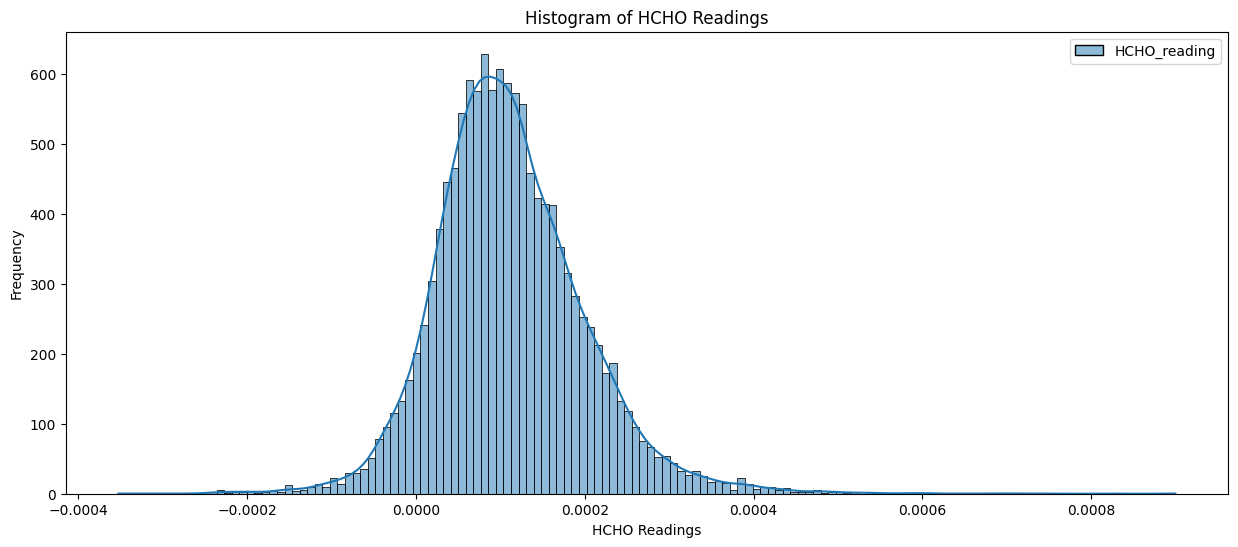

In [192]:
# Histogram for HCHO Readings

plt.figure(figsize=(15,6))
sns.histplot(data = df_sl_cities, kde=True)
plt.title('Histogram of HCHO Readings')
plt.xlabel('HCHO Readings')
plt.ylabel('Frequency')
plt.show()

### Observations
1.   Histogram for whole dataset shows a bell shaped graph
2. HCHO values are fall around  0.0001
3. Most of the readings are similar to 0.0001 value.

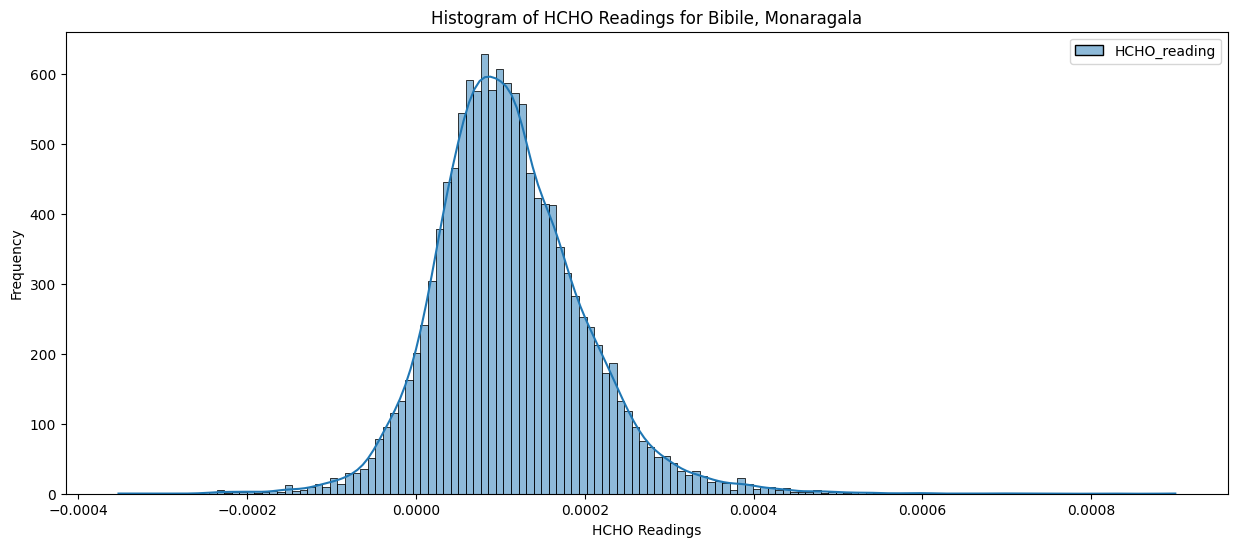

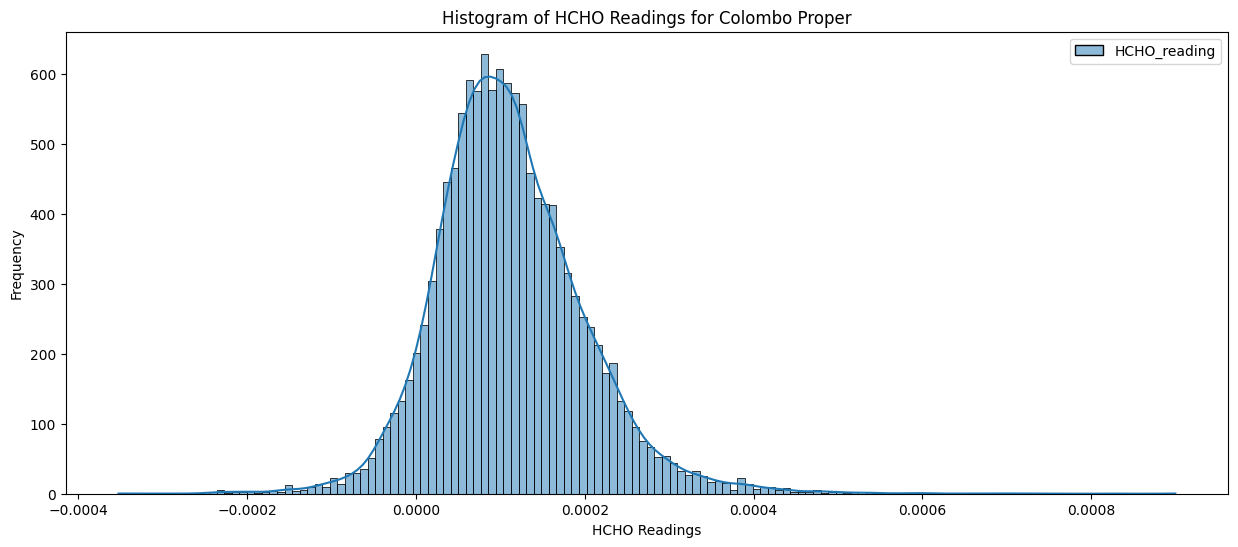

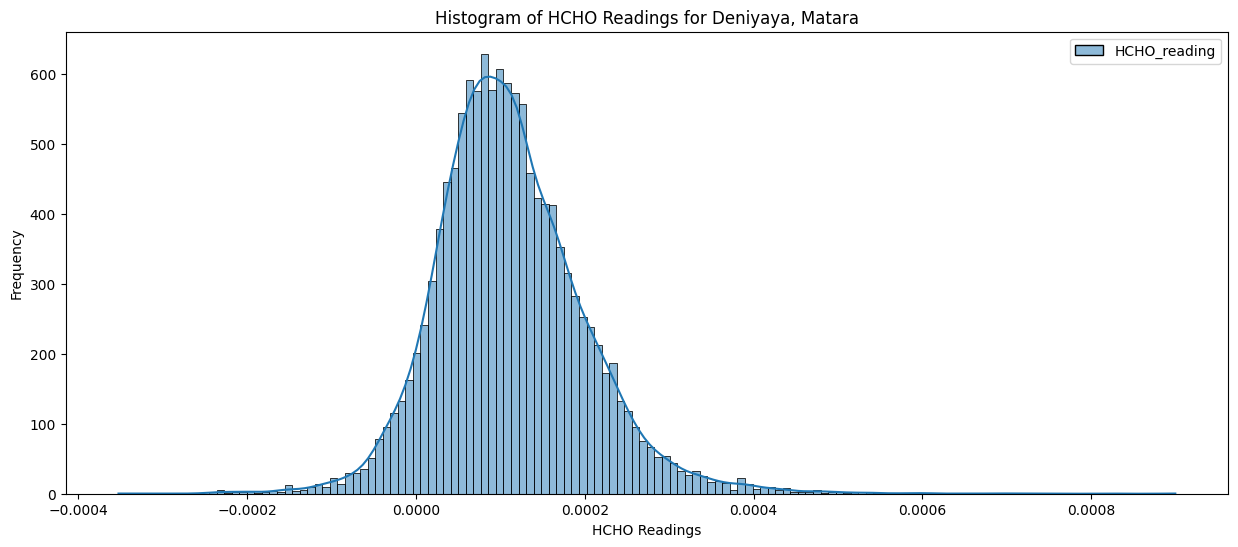

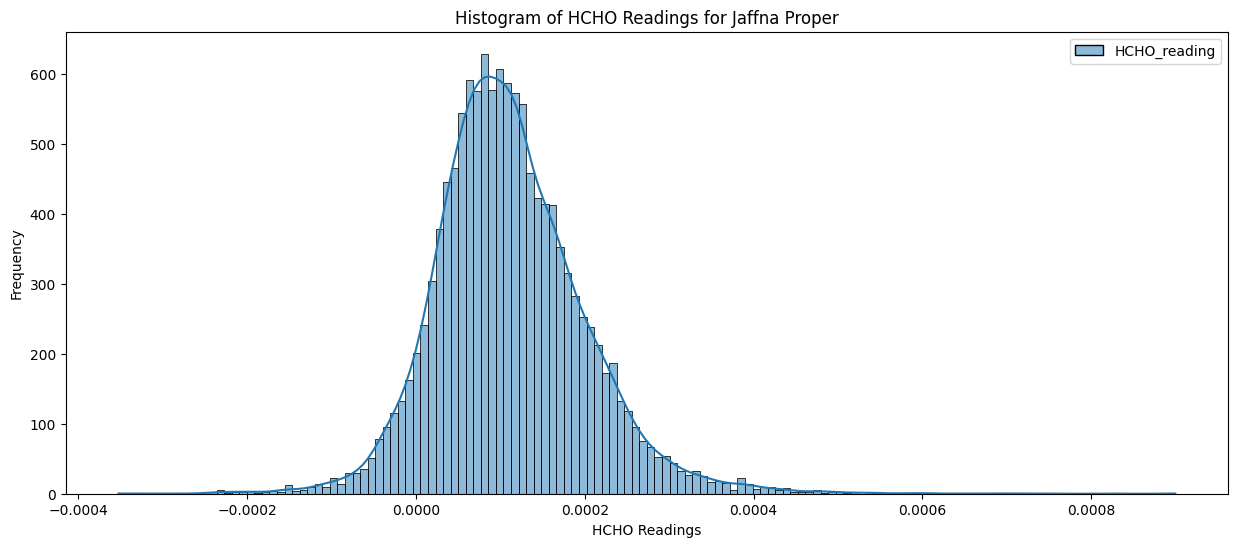

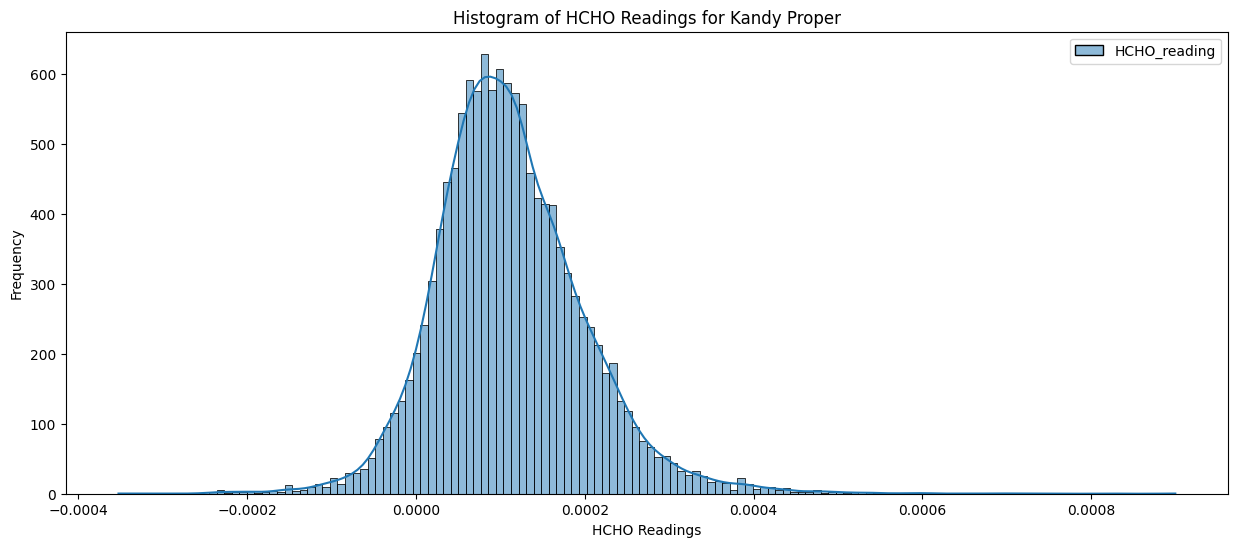

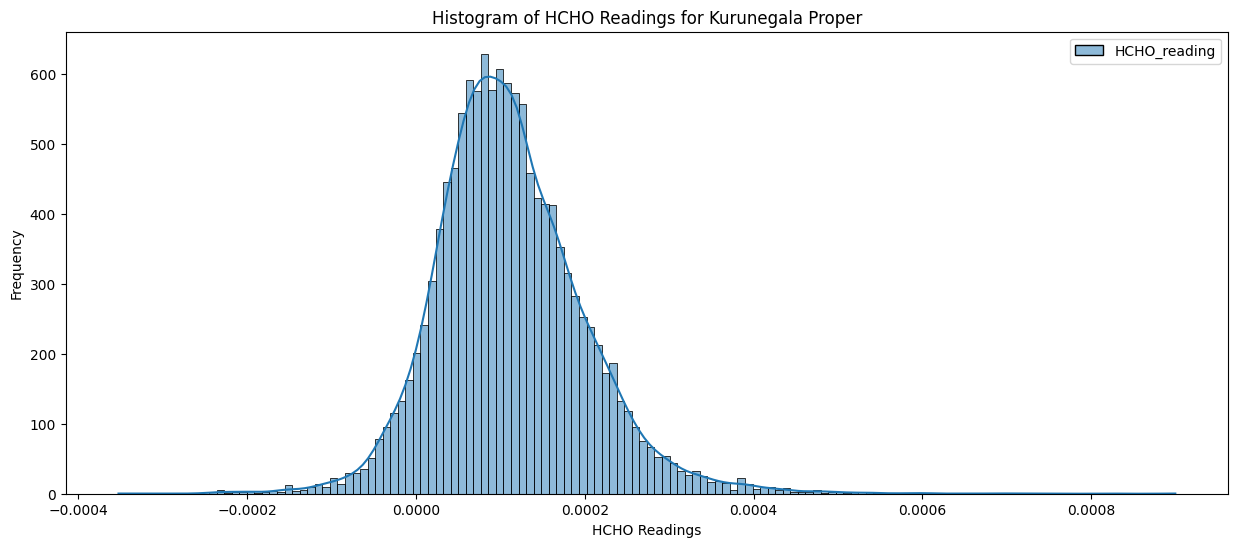

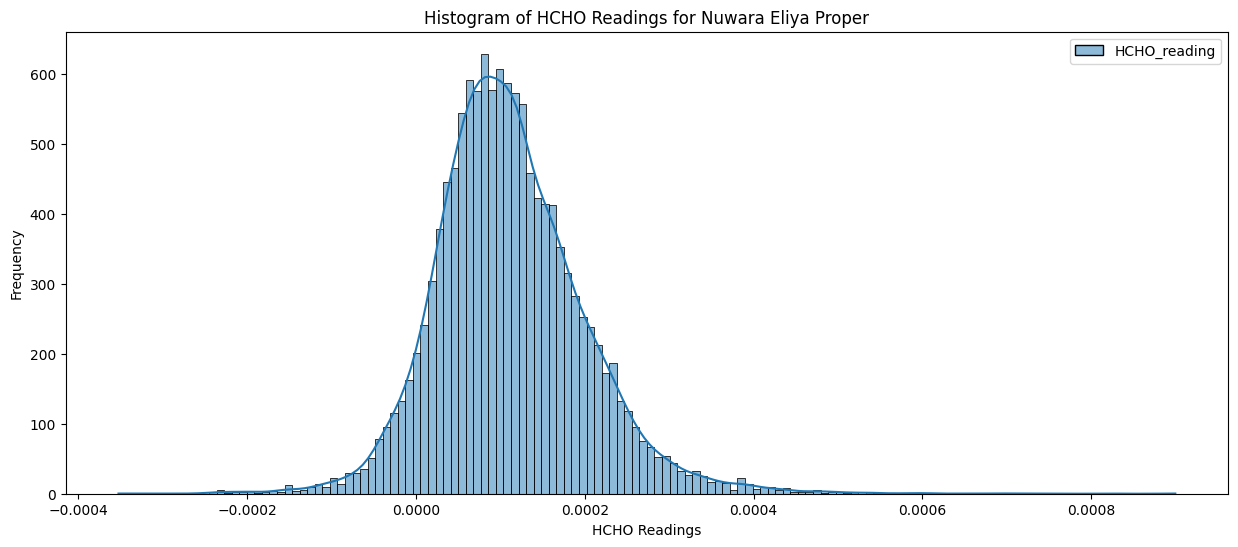

In [193]:
# Histogram of HCHO Readings for each city
for location, grouped_data in df_sl_cities_groups:

  plt.figure(figsize=(15,6))
  sns.histplot(data = df_sl_cities, kde=True)
  plt.title(f'Histogram of HCHO Readings for {location}')
  plt.xlabel('HCHO Readings')
  plt.ylabel('Frequency')
  plt.show()

### Observations
1.   Histogram for locationas shows a bell shaped graph
2. HCHO values are fall around  0.0001 and 0.0002
3. Most of the readings are similar to 0.0001 value.




## Histograms to find data imbalance


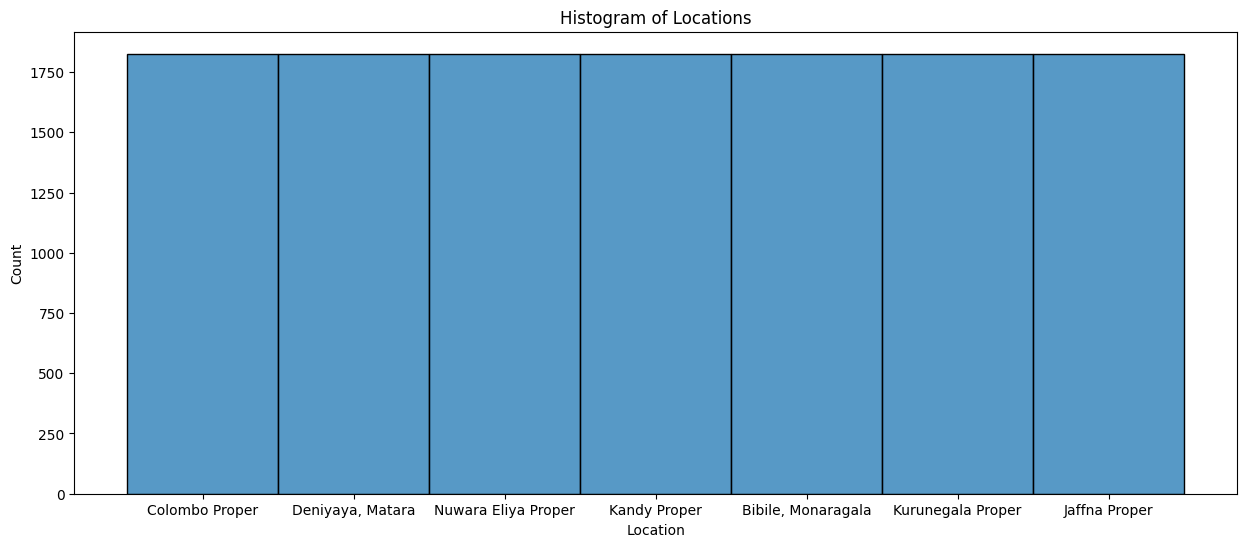

In [194]:
plt.figure(figsize=(15,6))
sns.histplot(data = df_sl_cities, x='Location' )
plt.title('Histogram of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

### Observations
1. There are no signs of data imbalance **bold text**

## Boxplots to find outliers



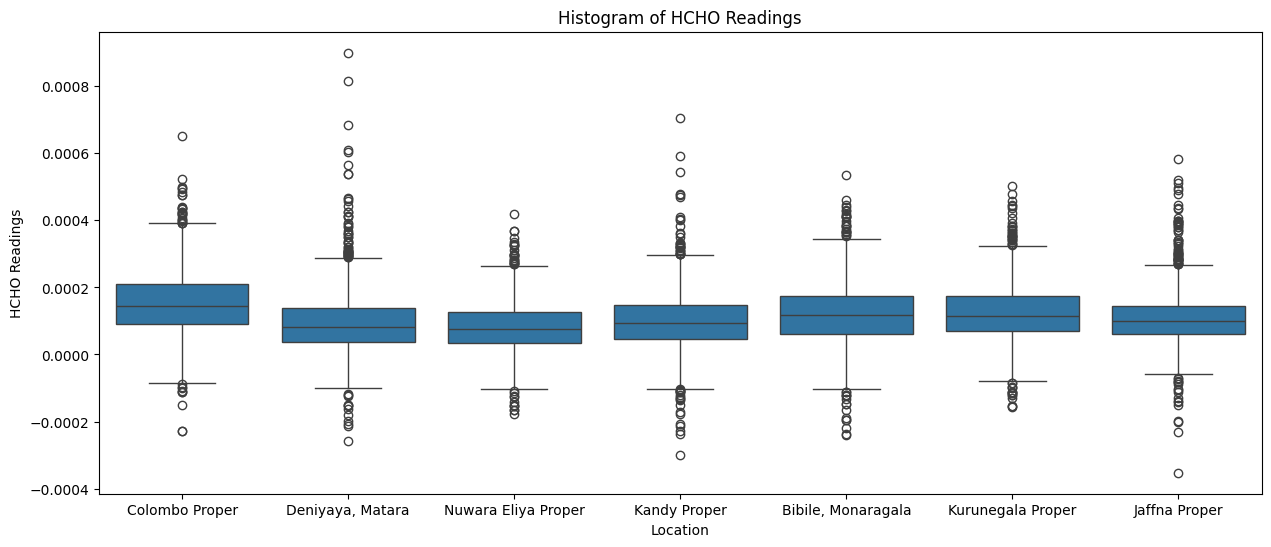

In [195]:
# Boxplots for HCHO Readings

plt.figure(figsize=(15,6))
sns.boxplot(x='Location', y='HCHO_reading', data = df_sl_cities)
plt.title('Histogram of HCHO Readings')
plt.ylabel('HCHO Readings')
plt.xlabel('Location')
plt.show()

### Observations
1. There are outliers

In [196]:
 df_sl_cities_group1 = df_sl_cities.groupby("Location")

In [197]:
Q1 = df_sl_cities_group1['HCHO_reading'].quantile(0.25)
Q3 = df_sl_cities_group1['HCHO_reading'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_sl_cities['HCHO_reading'] = df_sl_cities_group1['HCHO_reading'].transform(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))
print("______________________________________________________________________")
df_sl_cities.shape

______________________________________________________________________


(12779, 4)

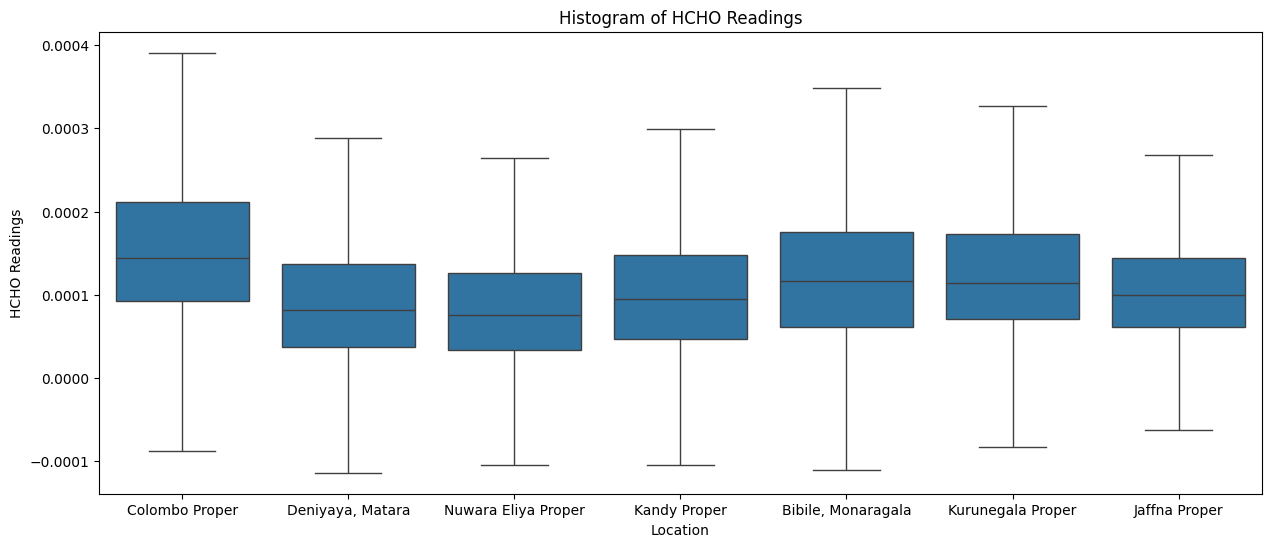

In [198]:
# Boxplots for HCHO Readings

plt.figure(figsize=(15,6))
sns.boxplot(x='Location', y='HCHO_reading', data = df_sl_cities)
plt.title('Histogram of HCHO Readings')
plt.ylabel('HCHO Readings')
plt.xlabel('Location')
plt.show()

# **2. Spatio-Temporal Analysis**

## Changes in gas emissions due to the COVID-19 lockdowns

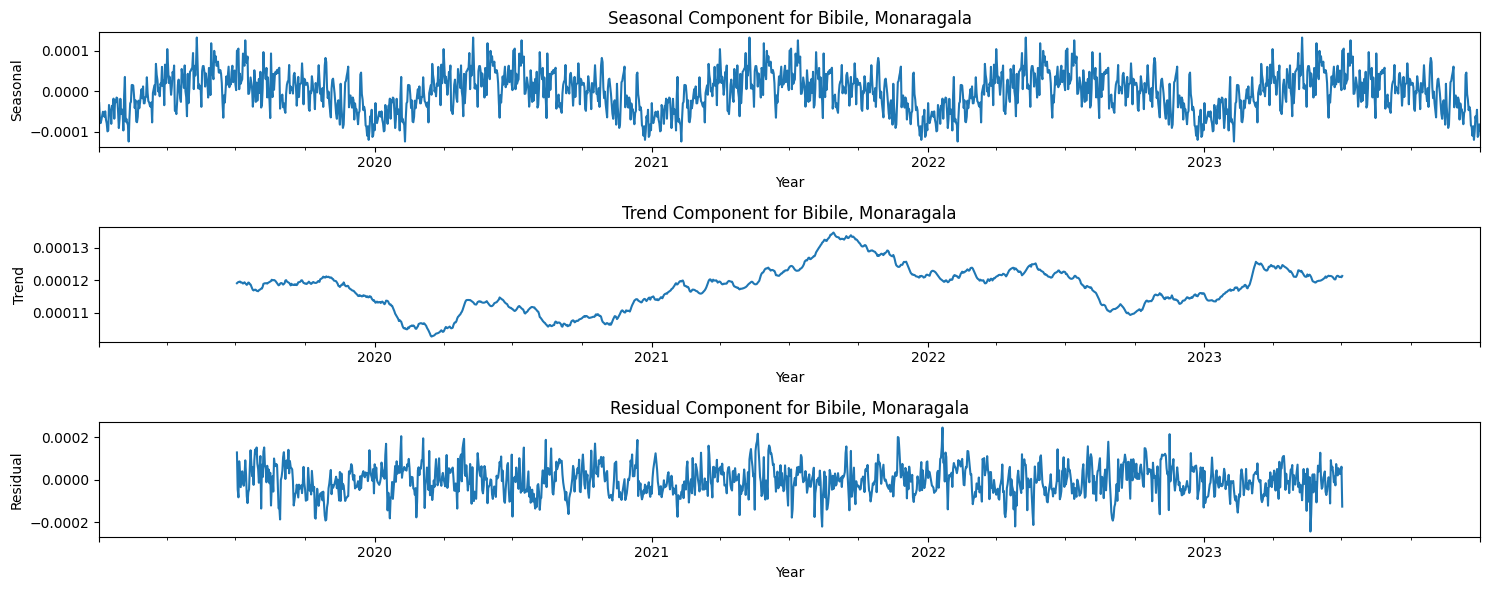

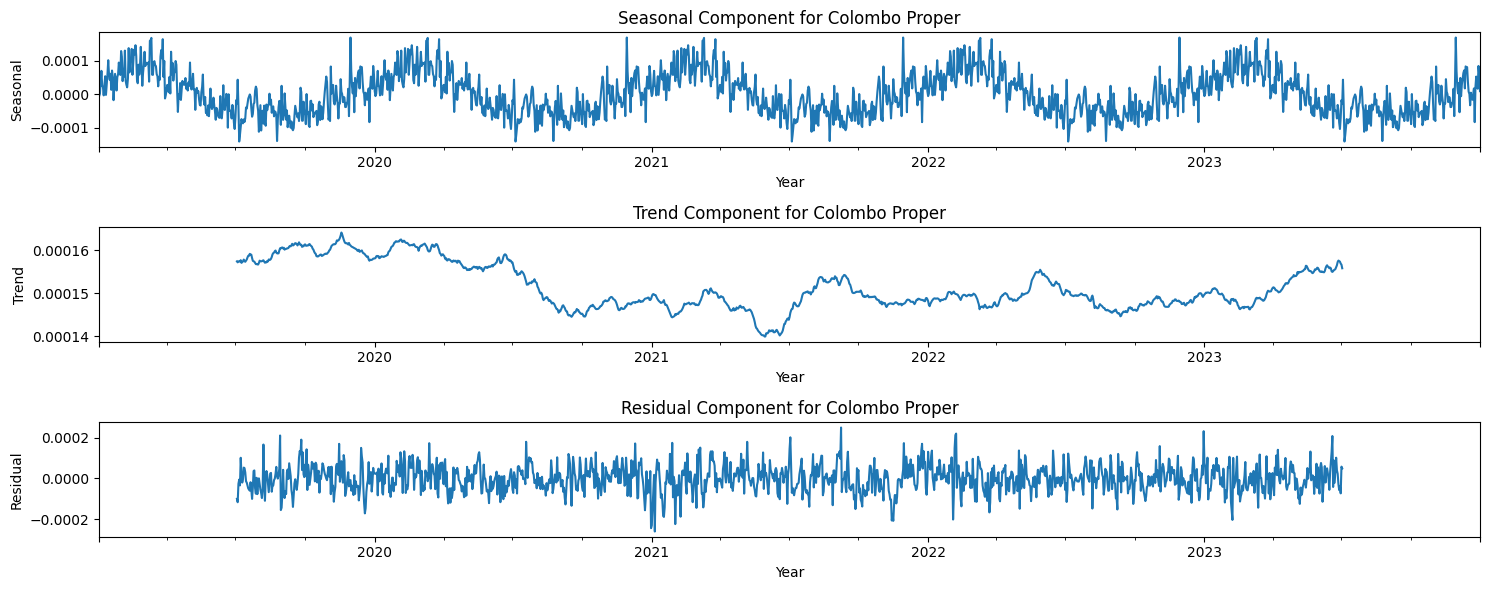

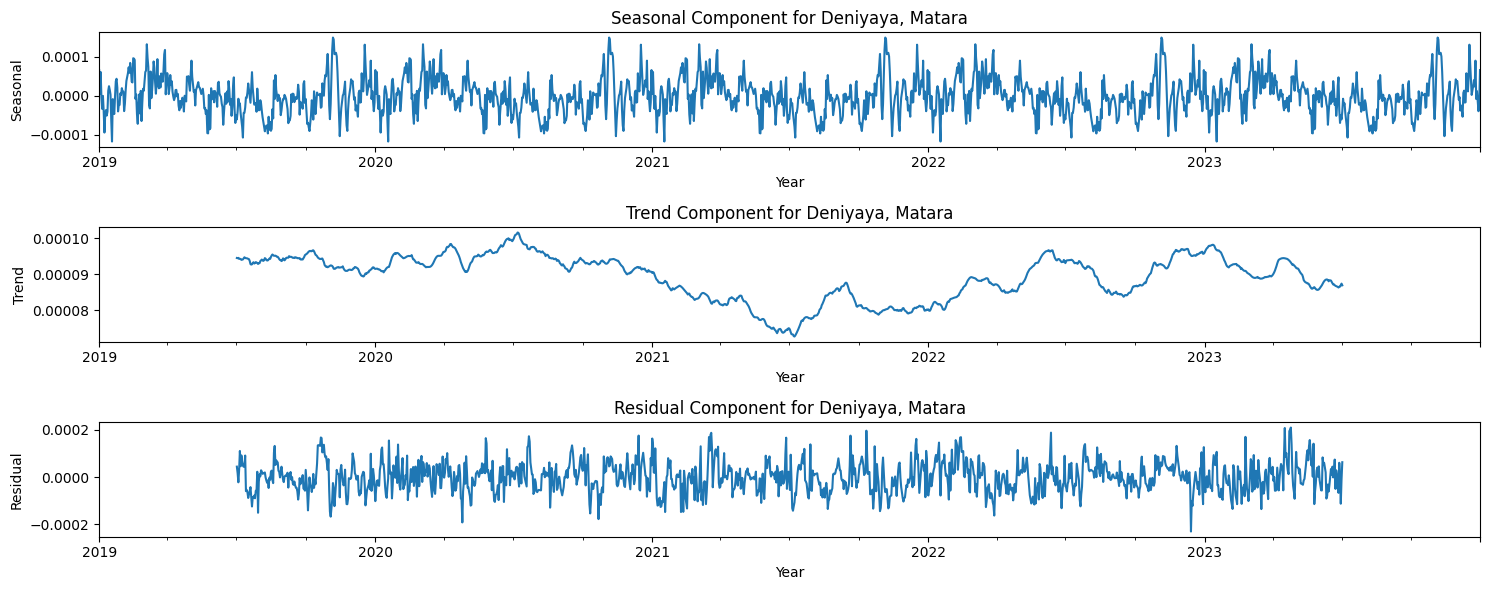

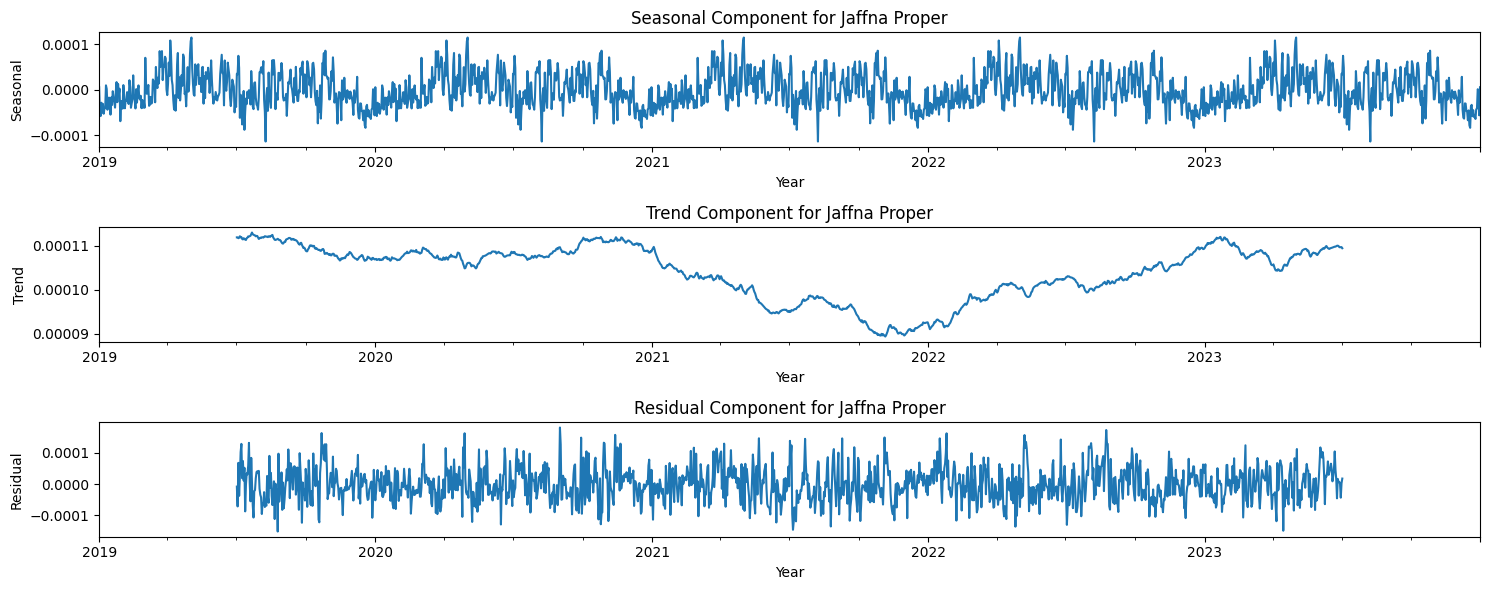

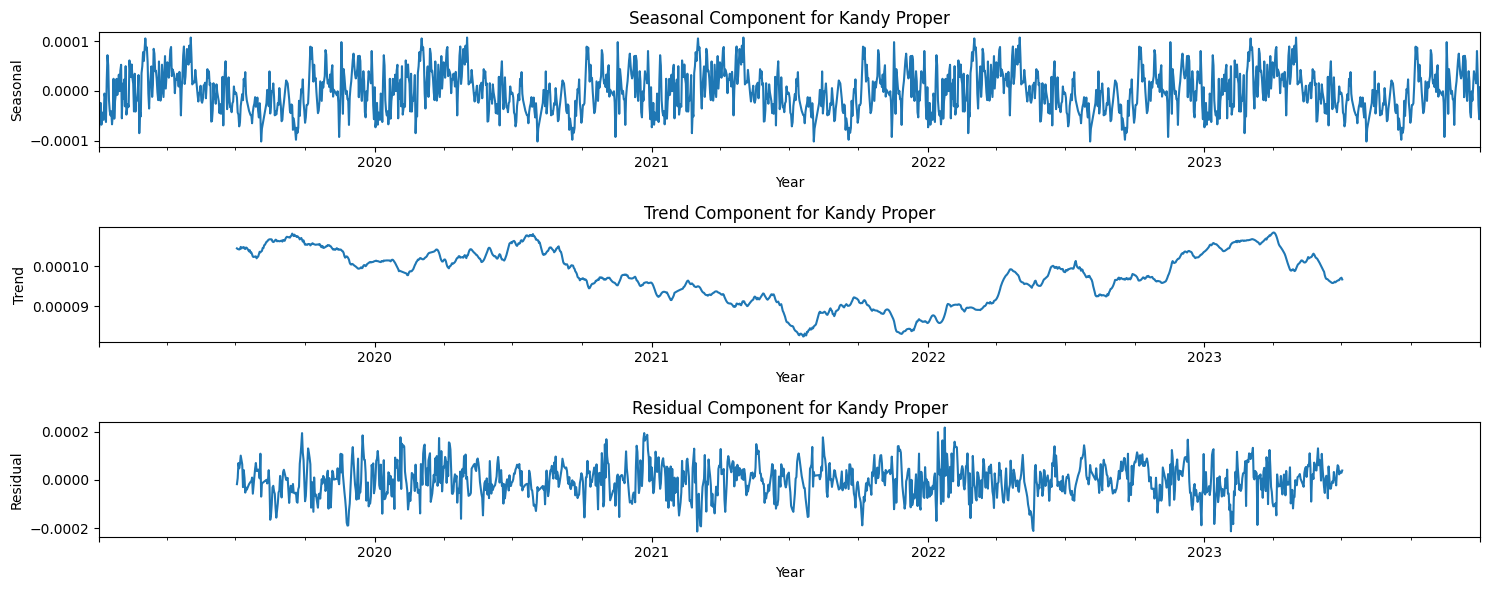

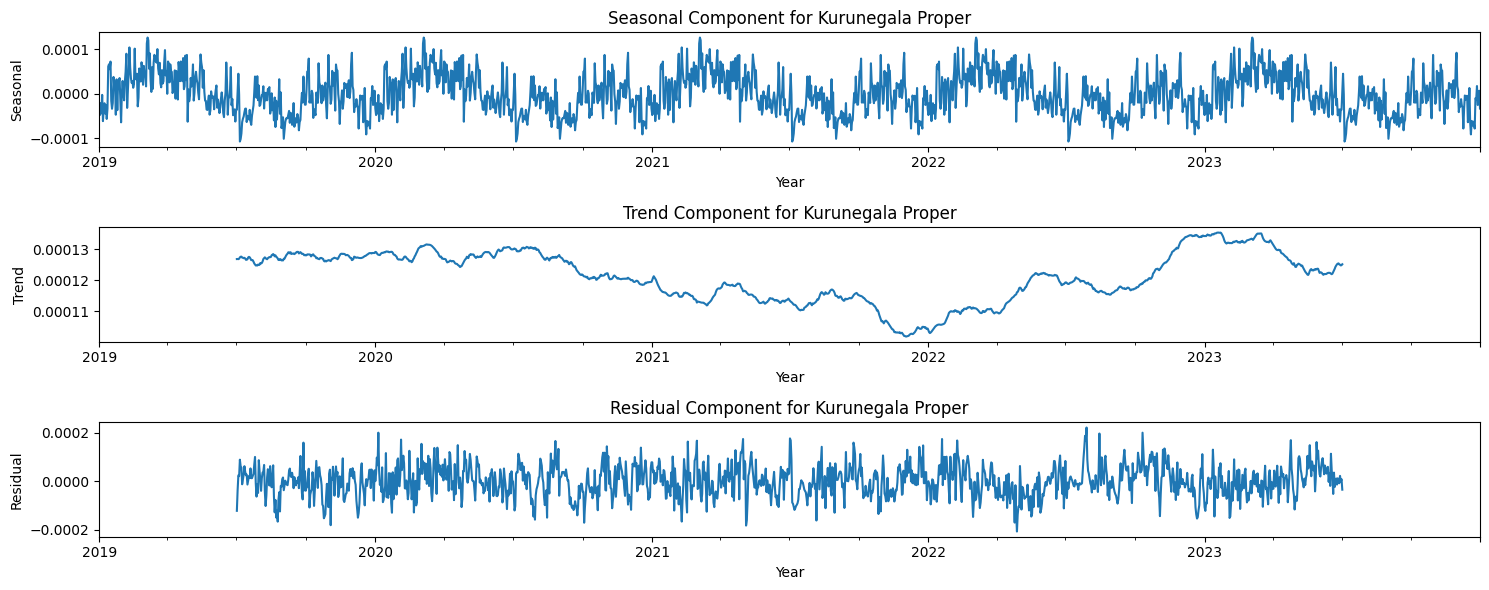

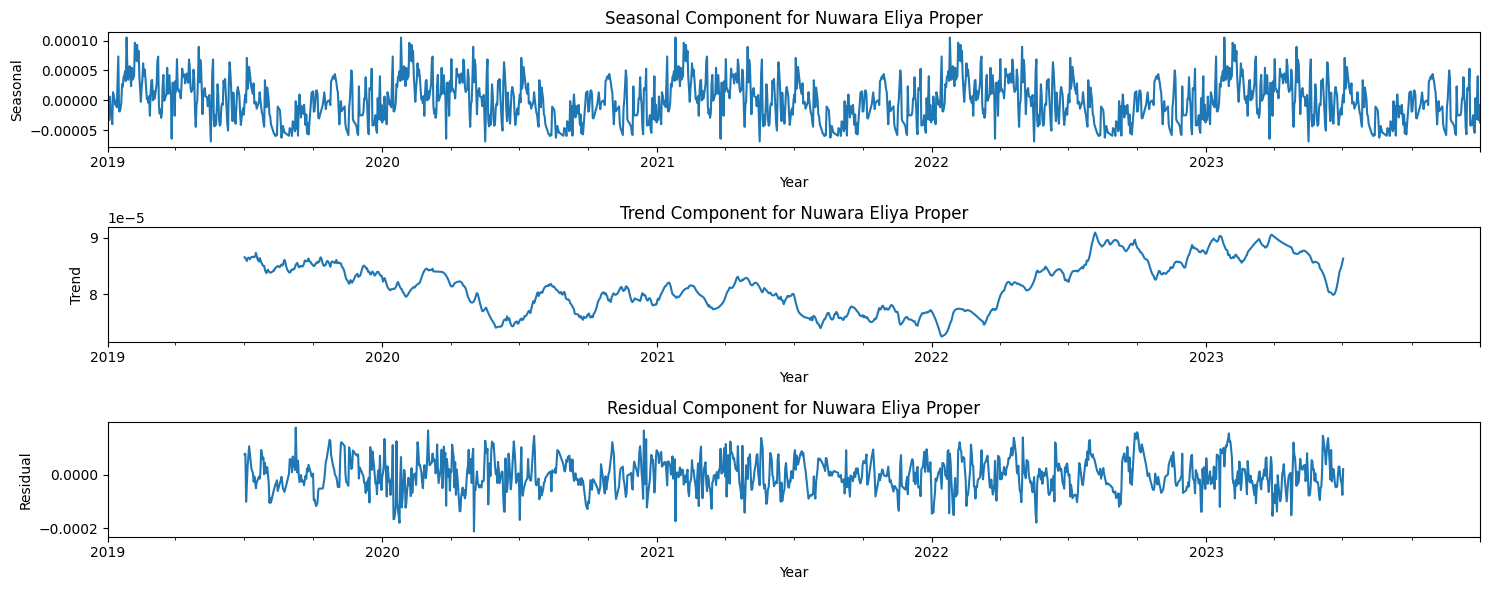

In [199]:
df_spatio = df_sl_cities.copy()

df_spatio_grouped = df_spatio.groupby("Location")

from statsmodels.tsa.seasonal import seasonal_decompose

for location, grouped_data in df_spatio_grouped:

  grouped_data.set_index('Current_Date', inplace=True)

  decomp = seasonal_decompose(grouped_data['HCHO_reading'], model='addictive', period=365)

  plt.figure(figsize=(15, 6))

  # seasonal component
  plt.subplot(3, 1, 1)
  decomp.seasonal.plot()
  plt.title(f'Seasonal Component for {location}')
  plt.xlabel('Year')
  plt.ylabel('Seasonal')

  # trend component
  plt.subplot(3, 1, 2)
  decomp.trend.plot()
  plt.title(f'Trend Component for {location}')
  plt.xlabel('Year')
  plt.ylabel('Trend')

  # residual component
  plt.subplot(3, 1, 3)
  decomp.resid.plot()
  plt.title(f'Residual Component for {location}')
  plt.xlabel('Year')
  plt.ylabel('Residual')

  plt.tight_layout()
  plt.show()



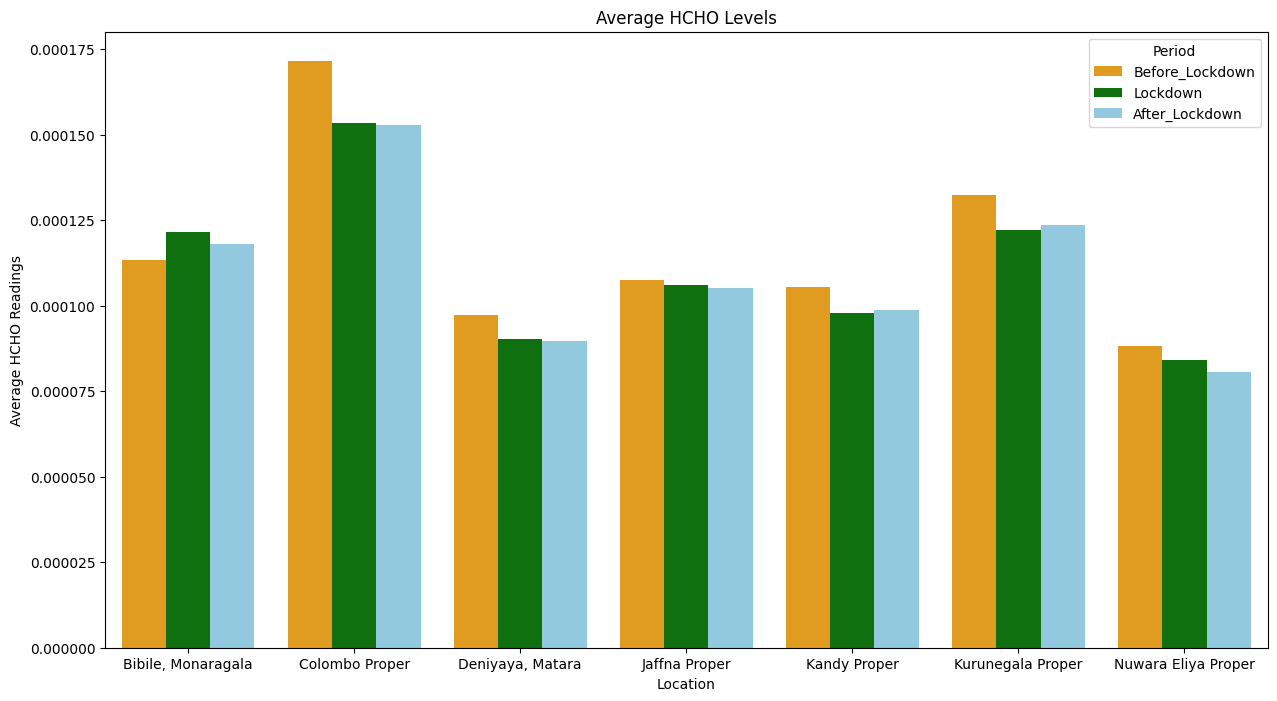

In [200]:
before_lockdown = df_spatio[(df_spatio['Current_Date'] < '2020-03-12')]
lockdown = df_spatio[(df_spatio['Current_Date'] >= '2020-03-12') & (df_spatio['Current_Date'] >= '2021-12-31')]
after_lockdown = df_spatio[(df_spatio['Current_Date'] < '2021-12-31')]

avg_HCHO = pd.DataFrame({
    'Location' : before_lockdown.groupby('Location')['HCHO_reading'].mean().index,
    'Before_Lockdown' : before_lockdown.groupby('Location')['HCHO_reading'].mean().values,
    'Lockdown' : lockdown.groupby('Location')['HCHO_reading'].mean().values,
    'After_Lockdown' : after_lockdown.groupby('Location')['HCHO_reading'].mean().values
})

melt_avg_HCHO = pd.melt(avg_HCHO, id_vars='Location', value_vars=['Before_Lockdown', 'Lockdown', 'After_Lockdown'], var_name='Period', value_name='Average HCHO Reading')

plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Average HCHO Reading', hue='Period', data=melt_avg_HCHO, palette={'Before_Lockdown' : 'orange', 'Lockdown' : 'green', 'After_Lockdown' : 'skyblue'})
plt.title('Average HCHO Levels')
plt.xlabel('Location')
plt.ylabel('Average HCHO Readings')
plt.legend(title='Period')
plt.show()

## Data Preprocessing 2

### Descriptive analysis 2

In [201]:
external_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          8750 non-null   object 
 1   NAME             8750 non-null   object 
 2   LATITUDE         8750 non-null   float64
 3   LONGITUDE        8750 non-null   float64
 4   ELEVATION        8750 non-null   float64
 5   DATE             8750 non-null   object 
 6   PRCP             8713 non-null   float64
 7   PRCP_ATTRIBUTES  8713 non-null   object 
 8   TAVG             8750 non-null   int64  
 9   TAVG_ATTRIBUTES  8750 non-null   object 
 10  TMAX             7790 non-null   float64
 11  TMAX_ATTRIBUTES  7790 non-null   object 
 12  TMIN             7101 non-null   float64
 13  TMIN_ATTRIBUTES  7101 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 957.2+ KB


In [202]:
print(external_df.shape)
external_df.head()

(8750, 14)


STATION            NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
0  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-02   
1  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-03   
2  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-04   
3  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-05   
4  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-06   

   PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  TMAX TMAX_ATTRIBUTES  TMIN  \
0   0.0             ,,S    78            H,,S   NaN             NaN  72.0   
1   0.0             ,,S    81            H,,S  87.0             ,,S  71.0   
2   0.0             ,,S    83            H,,S  88.0             ,,S  69.0   
3   0.0             ,,S    84            H,,S  90.0             ,,S  65.0   
4   0.0             ,,S    82            H,,S  88.0             ,,S  71.0   

  TMIN_ATTRIBUTES  
0             ,,S  
1             ,,S  
2             ,,S  
3             ,,S  
4             ,,S

In [203]:
external_df['NAME'].unique()

array(['KURUNEGALA, CE', 'CHINA BAY, CE', 'COLOMBO, CE',
       'NUWARA ELIYA, CE', 'PUTTALAM, CE'], dtype=object)

In [204]:
external_df.describe().T

count        mean         std     min     25%     50%      75%  \
LATITUDE   8750.0    7.581213    0.630715   6.900   6.967   7.467    8.033   
LONGITUDE  8750.0   80.403493    0.521807  79.833  79.867  80.367   80.767   
ELEVATION  8750.0  403.358149  742.782456   1.800   2.000   7.000  116.000   
PRCP       8713.0    0.217926    0.564511   0.000   0.000   0.000    0.140   
TAVG       8750.0   77.965943    8.902745  51.000  78.000  81.000   84.000   
TMAX       7790.0   85.326059    9.065784  56.000  84.000  88.000   91.000   
TMIN       7101.0   71.878045    9.452061  37.000  72.000  75.000   78.000   

                max  
LATITUDE      8.539  
LONGITUDE    81.182  
ELEVATION  1880.000  
PRCP          7.430  
TAVG         93.000  
TMAX        101.000  
TMIN         85.000

### Removing the unnecessery columns and rows

In [205]:
# dropping the unnecessory details from the drafeame
external_df = external_df.drop(columns=['STATION', 'LATITUDE', 'LONGITUDE', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES'], axis=1)
print(external_df.shape)
external_df.head()

(8750, 5)


NAME  ELEVATION        DATE  PRCP  TAVG
0  KURUNEGALA, CE      116.0  2019-01-02   0.0    78
1  KURUNEGALA, CE      116.0  2019-01-03   0.0    81
2  KURUNEGALA, CE      116.0  2019-01-04   0.0    83
3  KURUNEGALA, CE      116.0  2019-01-05   0.0    84
4  KURUNEGALA, CE      116.0  2019-01-06   0.0    82

In [206]:
# dropping the cities that dont have HCHO reading
china_bay =(external_df['NAME'] == 'CHINA BAY, CE')
external_df = external_df.drop(external_df[china_bay].index)
puttalam =(external_df['NAME'] == 'PUTTALAM, CE')
external_df = external_df.drop(external_df[puttalam].index)
print(external_df.shape)
external_df['NAME'].unique()

(5233, 5)


array(['KURUNEGALA, CE', 'COLOMBO, CE', 'NUWARA ELIYA, CE'], dtype=object)

In [207]:
external_df.describe().T

count        mean         std   min   25%    50%      75%      max
ELEVATION  5233.0  673.170648  861.074446   7.0   7.0  116.0  1880.00  1880.00
PRCP       5216.0    0.246557    0.569752   0.0   0.0    0.0     0.21     7.43
TAVG       5233.0   74.950315   10.219954  51.0  62.0   80.0    83.00    92.00

In [208]:
external_df.isnull().sum()

NAME          0
ELEVATION     0
DATE          0
PRCP         17
TAVG          0
dtype: int64

In [209]:
external_df_groups1 = external_df.groupby("NAME")

In [210]:
# Reset Index before handling the null value
external_df.reset_index(drop=True, inplace=True)

# useing interpolate
external_df['PRCP'] = external_df_groups1['PRCP'].transform(lambda x: x.interpolate(method='linear'))

print('____________________________________________________________')

external_df.isnull().sum()

____________________________________________________________


NAME         0
ELEVATION    0
DATE         0
PRCP         0
TAVG         0
dtype: int64

In [211]:
external_df.duplicated().sum()

0

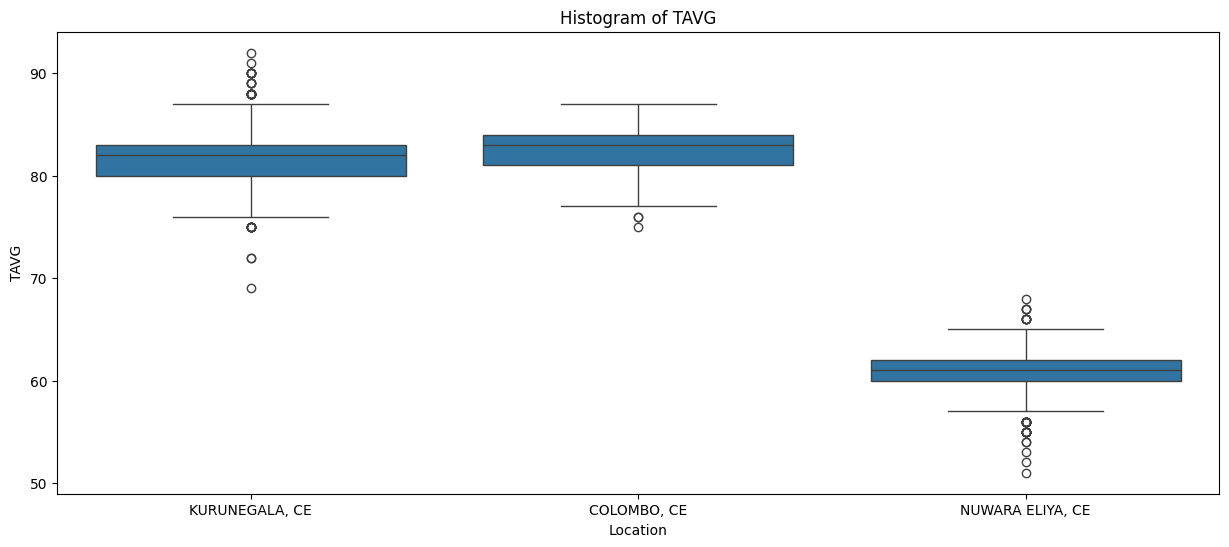

In [212]:
plt.figure(figsize=(15,6))
sns.boxplot(x='NAME', y='TAVG', data = external_df)
plt.title('Histogram of TAVG')
plt.ylabel('TAVG')
plt.xlabel('Location')
plt.show()

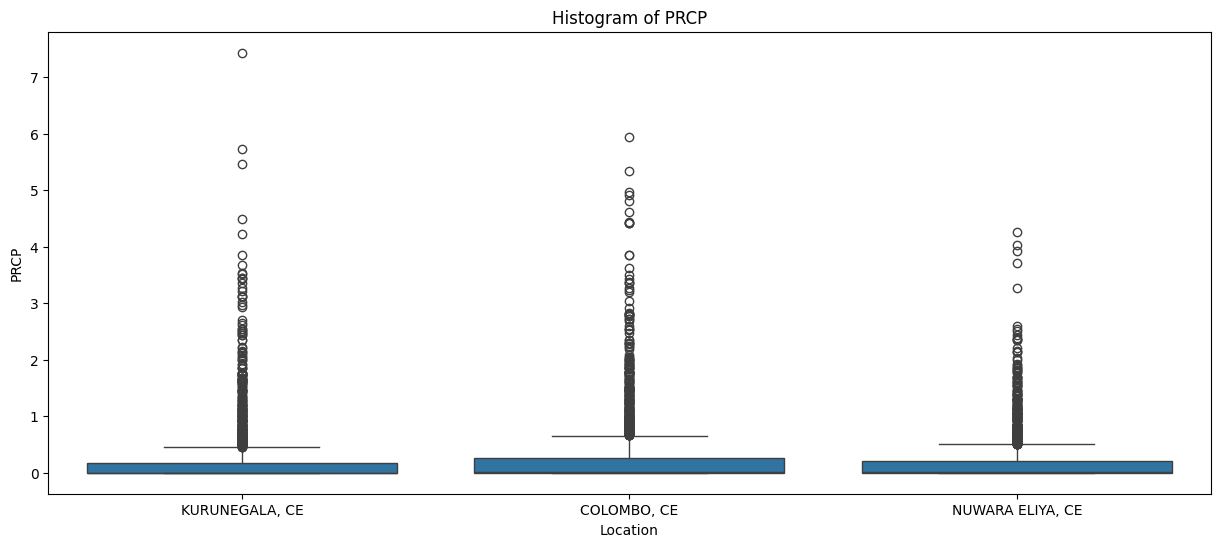

In [213]:
plt.figure(figsize=(15,6))
sns.boxplot(x='NAME', y='PRCP', data = external_df)
plt.title('Histogram of PRCP')
plt.ylabel('PRCP')
plt.xlabel('Location')
plt.show()

In [214]:
 external_df_group1 = external_df.groupby("NAME")

In [215]:
Q1 = external_df_group1['TAVG'].quantile(0.25)
Q3 = external_df_group1['TAVG'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
external_df['TAVG'] = external_df_group1['TAVG'].transform(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))
print("______________________________________________________________________")
external_df.shape

______________________________________________________________________


(5233, 5)

In [216]:
Q1 = external_df_group1['PRCP'].quantile(0.25)
Q3 = external_df_group1['PRCP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
external_df['PRCP'] = external_df_group1['PRCP'].transform(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))
print("______________________________________________________________________")
external_df.shape

______________________________________________________________________


(5233, 5)

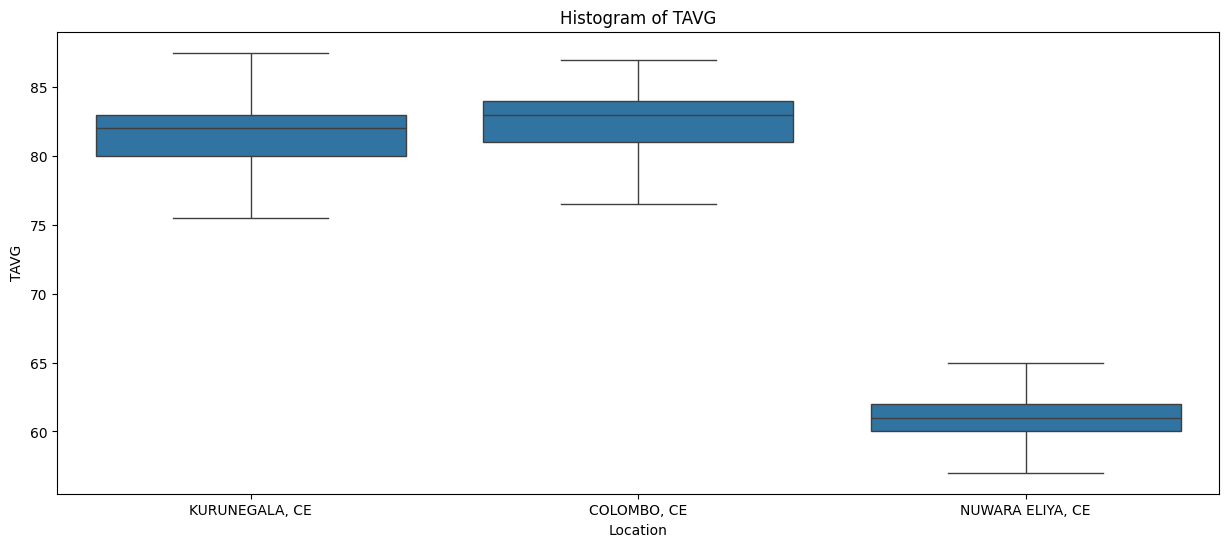

In [217]:
plt.figure(figsize=(15,6))
sns.boxplot(x='NAME', y='TAVG', data = external_df)
plt.title('Histogram of TAVG')
plt.ylabel('TAVG')
plt.xlabel('Location')
plt.show()

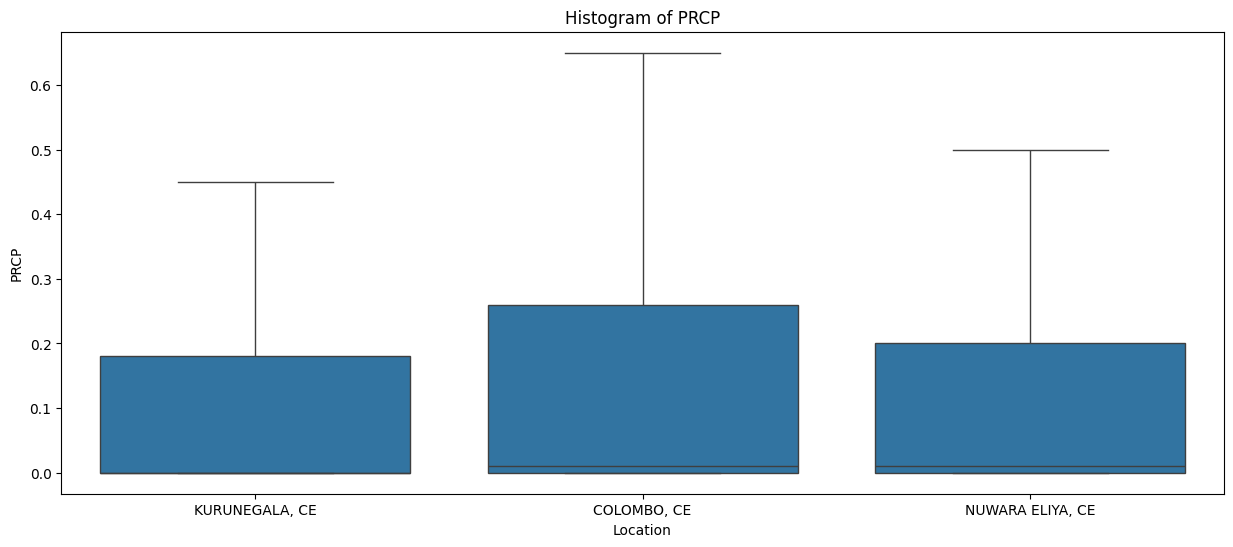

In [218]:
plt.figure(figsize=(15,6))
sns.boxplot(x='NAME', y='PRCP', data = external_df)
plt.title('Histogram of PRCP')
plt.ylabel('PRCP')
plt.xlabel('Location')
plt.show()

In [219]:
external_df['DATE'] = pd.to_datetime(external_df['DATE'])
external_df = external_df.rename(columns={'NAME': 'Location'})
external_df = external_df.rename(columns={'DATE': 'Current_Date'})
external_df = external_df.rename(columns={'ELEVATION': 'Elevation'})
external_df = external_df.rename(columns={'PRCP': 'Precipitation'})
external_df = external_df.rename(columns={'TAVG': 'Temperature_avg'})
external_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Location         5233 non-null   object        
 1   Elevation        5233 non-null   float64       
 2   Current_Date     5233 non-null   datetime64[ns]
 3   Precipitation    5233 non-null   float64       
 4   Temperature_avg  5233 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 204.5+ KB


In [220]:
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-12-31')

external_df = external_df[(external_df['Current_Date'] >= start_date) & (external_df['Current_Date'] <= end_date)]

print(external_df.shape)

(5230, 5)


In [221]:
external_df['Location'].unique()

array(['KURUNEGALA, CE', 'COLOMBO, CE', 'NUWARA ELIYA, CE'], dtype=object)

In [222]:
external_df['Location'] = external_df['Location'].replace('KURUNEGALA, CE', 'Kurunegala Proper')
external_df['Location'] = external_df['Location'].replace('COLOMBO, CE', 'Colombo Proper')
external_df['Location'] = external_df['Location'].replace('NUWARA ELIYA, CE', 'Nuwara Eliya Proper')
external_df['Location'].unique()

<ipython-input-222-c2b0546006ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  external_df['Location'] = external_df['Location'].replace('KURUNEGALA, CE', 'Kurunegala Proper')
<ipython-input-222-c2b0546006ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  external_df['Location'] = external_df['Location'].replace('COLOMBO, CE', 'Colombo Proper')
<ipython-input-222-c2b0546006ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

array(['Kurunegala Proper', 'Colombo Proper', 'Nuwara Eliya Proper'],
      dtype=object)

In [223]:
external_df.reset_index(drop=True, inplace=True)
external_df.tail()

Location  Elevation Current_Date  Precipitation  \
5225  Nuwara Eliya Proper     1880.0   2023-12-27           0.35   
5226  Nuwara Eliya Proper     1880.0   2023-12-28           0.50   
5227  Nuwara Eliya Proper     1880.0   2023-12-29           0.50   
5228  Nuwara Eliya Proper     1880.0   2023-12-30           0.21   
5229  Nuwara Eliya Proper     1880.0   2023-12-31           0.28   

      Temperature_avg  
5225             61.0  
5226             61.0  
5227             60.0  
5228             60.0  
5229             60.0

In [224]:
df_spatio['Location'].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [225]:
den_mat =(df_spatio['Location'] == 'Deniyaya, Matara')
df_spatio = df_spatio.drop(df_spatio[den_mat].index)
kan =(df_spatio['Location'] == 'Kandy Proper')
df_spatio = df_spatio.drop(df_spatio[kan].index)
bib_mon =(df_spatio['Location'] == 'Bibile, Monaragala')
df_spatio = df_spatio.drop(df_spatio[bib_mon].index)
jaf =(df_spatio['Location'] == 'Jaffna Proper')
df_spatio = df_spatio.drop(df_spatio[jaf].index)
print(df_spatio.shape)
df_spatio['Location'].unique()

(5477, 4)


array(['Colombo Proper', 'Nuwara Eliya Proper', 'Kurunegala Proper'],
      dtype=object)

In [226]:
df_spatio.reset_index(drop=True, inplace=True)
df_spatio = df_spatio.drop(columns=['Next_Date'], axis=1)
df_spatio.tail()

HCHO_reading           Location Current_Date
5472      0.000075  Kurunegala Proper   2023-12-27
5473      0.000103  Kurunegala Proper   2023-12-28
5474      0.000130  Kurunegala Proper   2023-12-29
5475      0.000158  Kurunegala Proper   2023-12-30
5476      0.000158  Kurunegala Proper   2023-12-31

## Merging two datasets

In [227]:
df_merged_external = pd.merge(df_spatio, external_df, on=['Location', 'Current_Date'], how='inner')
df_merged_external

HCHO_reading           Location Current_Date  Elevation  Precipitation  \
0         0.000263     Colombo Proper   2019-01-02        7.0           0.00   
1         0.000099     Colombo Proper   2019-01-03        7.0           0.00   
2         0.000210     Colombo Proper   2019-01-04        7.0           0.00   
3         0.000179     Colombo Proper   2019-01-05        7.0           0.00   
4         0.000108     Colombo Proper   2019-01-06        7.0           0.00   
...            ...                ...          ...        ...            ...   
5224      0.000075  Kurunegala Proper   2023-12-27      116.0           0.45   
5225      0.000103  Kurunegala Proper   2023-12-28      116.0           0.29   
5226      0.000130  Kurunegala Proper   2023-12-29      116.0           0.38   
5227      0.000158  Kurunegala Proper   2023-12-30      116.0           0.45   
5228      0.000158  Kurunegala Proper   2023-12-31      116.0           0.06   

      Temperature_avg  
0                78.0  
1                81.0  
2                81.0  
3                81.0  
4                81.0  
...               ...  
5224             81.0  
5225             79.0  
5226             77.0  
5227             80.0  
5228             79.0  

[5229 rows x 6 columns]

In [228]:
df_merged_external.isnull().sum()

HCHO_reading       0
Location           0
Current_Date       0
Elevation          0
Precipitation      0
Temperature_avg    0
dtype: int64

In [229]:
external_df.duplicated().sum()

0

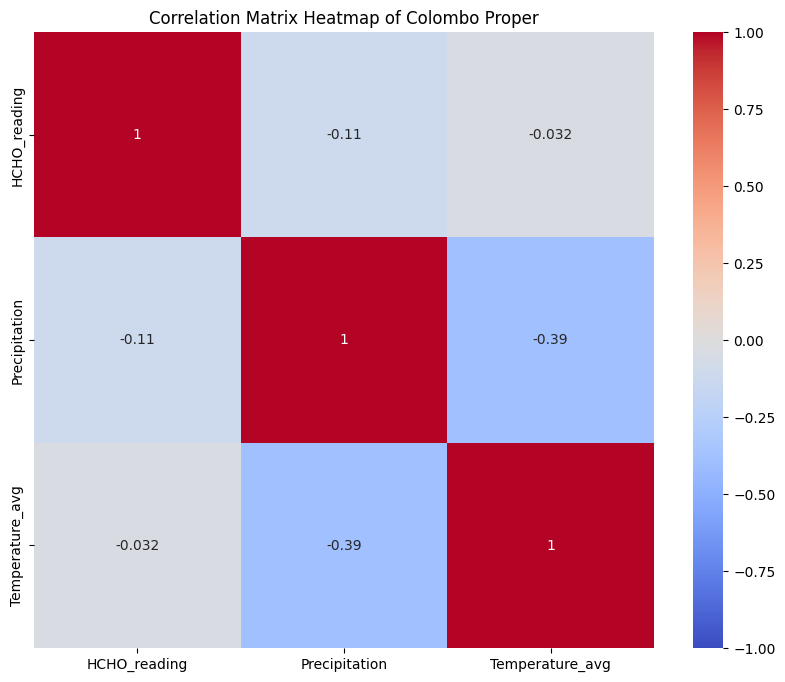

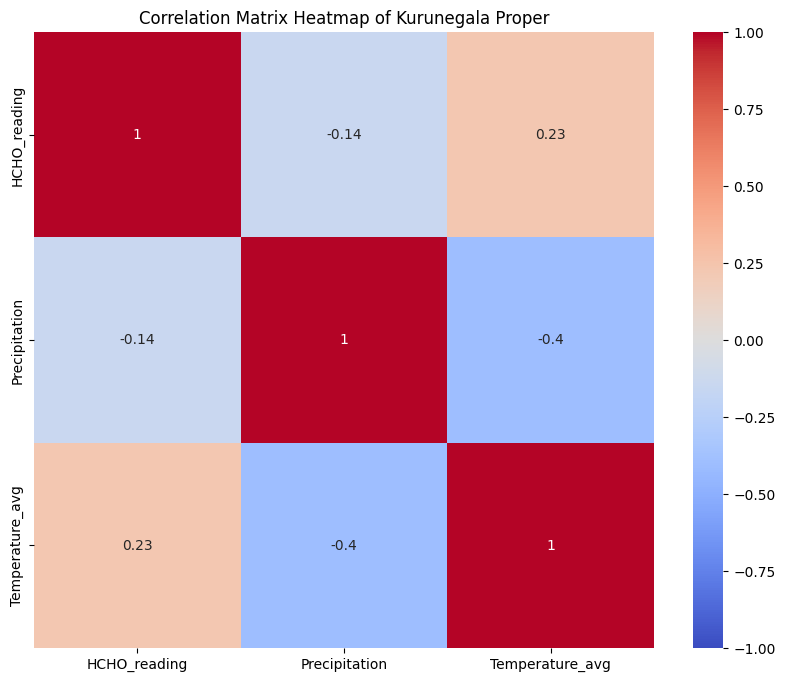

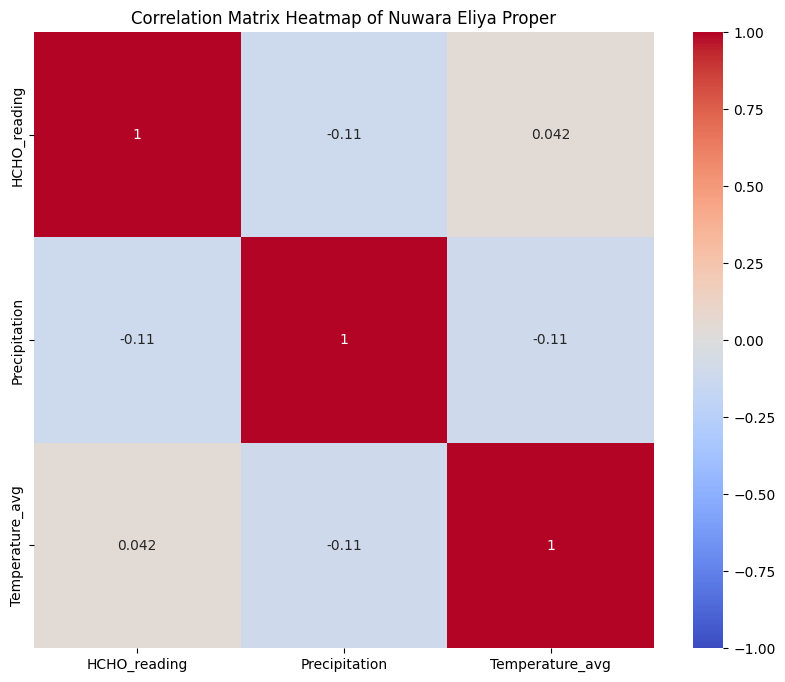

In [230]:
cor = ['HCHO_reading', 'Precipitation', 'Temperature_avg']
df_merged_external_grouped = df_merged_external.groupby('Location')

for location, group in df_merged_external_grouped:
  correlation_matrix = group[cor].corr()

  plt.figure(figsize=(10,8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
  plt.title(f'Correlation Matrix Heatmap of {location}')
  plt.show()

## Comparing spatial patterns

In [231]:
df_merged_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   HCHO_reading     5229 non-null   float64       
 1   Location         5229 non-null   object        
 2   Current_Date     5229 non-null   datetime64[ns]
 3   Elevation        5229 non-null   float64       
 4   Precipitation    5229 non-null   float64       
 5   Temperature_avg  5229 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 245.2+ KB


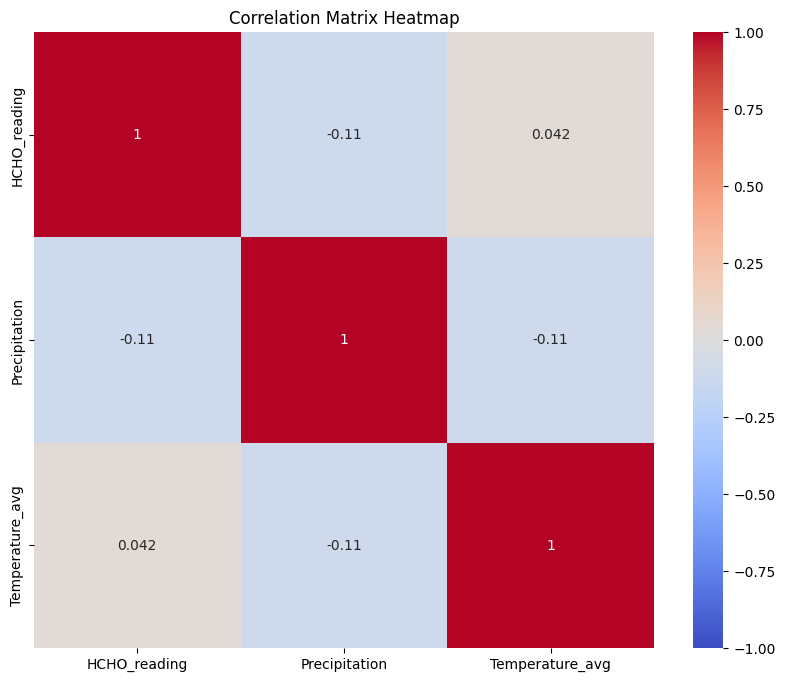

In [232]:
cor1 = ['HCHO_reading', 'Precipitation', 'Temperature_avg']
correlation_matrix = group[cor1].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Text(0, 0.5, 'HCHO_reading')

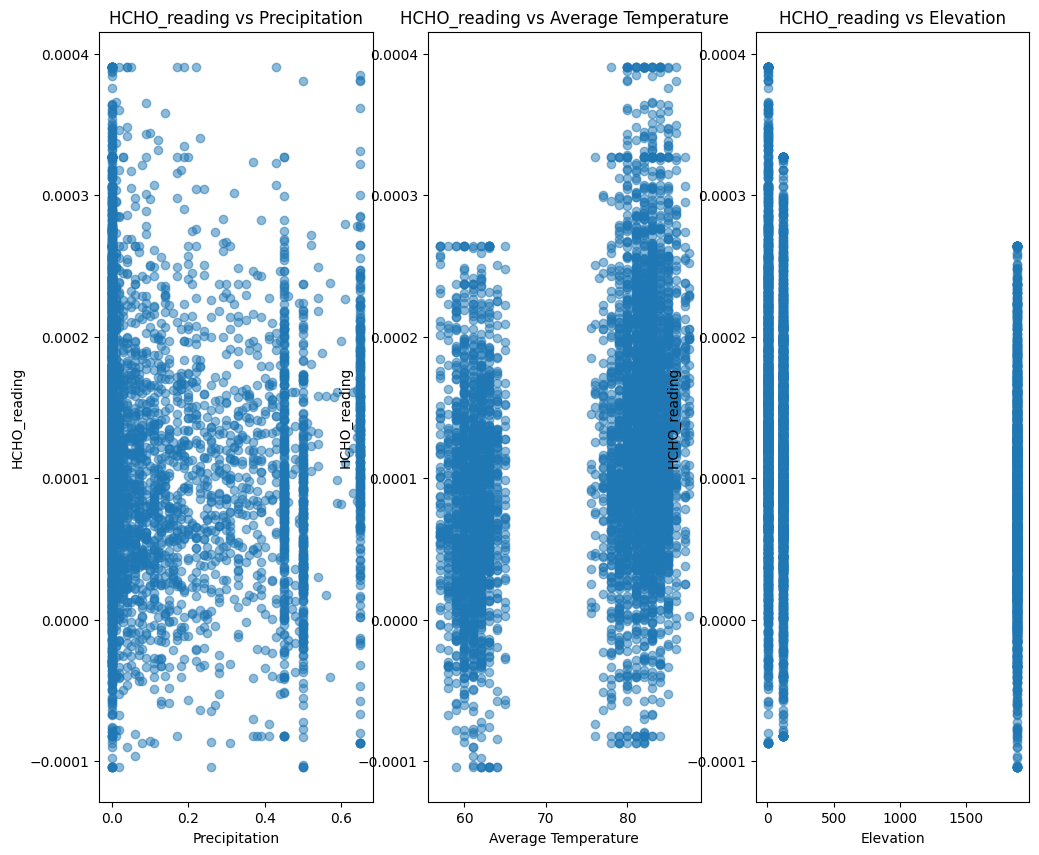

In [233]:
fig, axs = plt.subplots(1, 3, figsize=(12, 10))

axs[0].scatter(df_merged_external['Precipitation'], df_merged_external['HCHO_reading'], alpha=0.5)
axs[0].set_title('HCHO_reading vs Precipitation')
axs[0].set_xlabel('Precipitation')
axs[0].set_ylabel('HCHO_reading')

axs[1].scatter(df_merged_external['Temperature_avg'], df_merged_external['HCHO_reading'], alpha=0.5)
axs[1].set_title('HCHO_reading vs Average Temperature')
axs[1].set_xlabel('Average Temperature')
axs[1].set_ylabel('HCHO_reading')

axs[2].scatter(df_merged_external['Elevation'], df_merged_external['HCHO_reading'], alpha=0.5)
axs[2].set_title('HCHO_reading vs Elevation')
axs[2].set_xlabel('Elevation')
axs[2].set_ylabel('HCHO_reading')

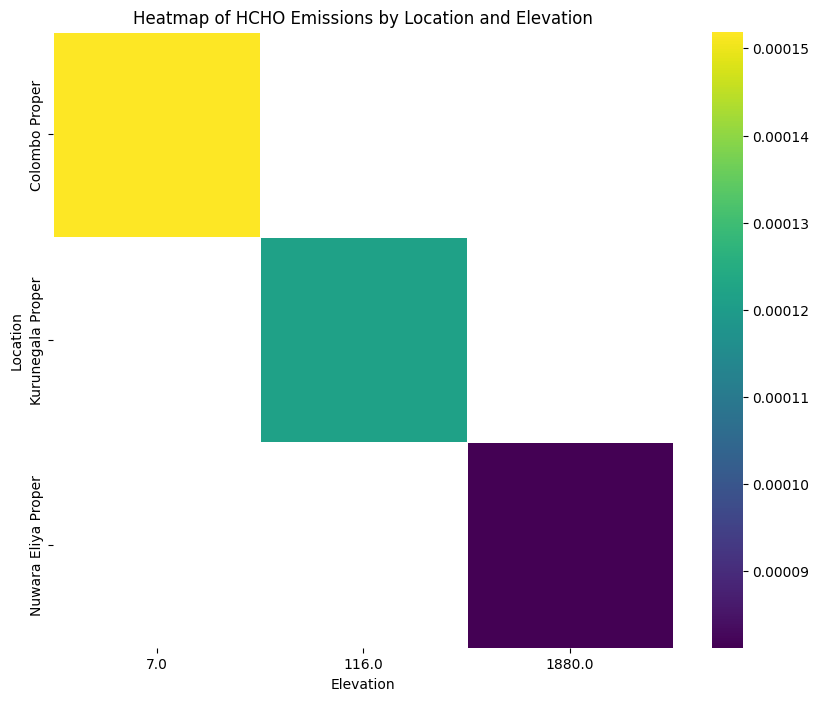

In [234]:
heatmap_data = df_merged_external.pivot_table(index='Location', columns='Elevation', values='HCHO_reading')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5)

plt.xlabel('Elevation')
plt.ylabel('Location')
plt.title('Heatmap of HCHO Emissions by Location and Elevation')

plt.show()

"Precipitation" - represents the amount of water (liquid or solid) that falls from the atmosphere and reaches the ground at a specific location and time

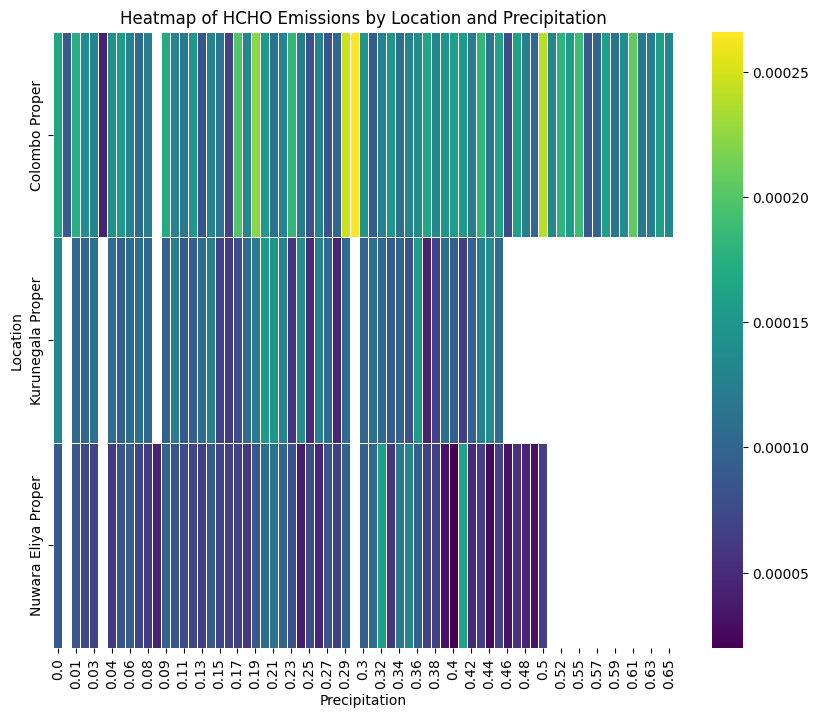

In [235]:
heatmap_data = df_merged_external.pivot_table(index='Location', columns='Precipitation', values='HCHO_reading')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5)

plt.xlabel('Precipitation')
plt.ylabel('Location')
plt.title('Heatmap of HCHO Emissions by Location and Precipitation')

plt.show()

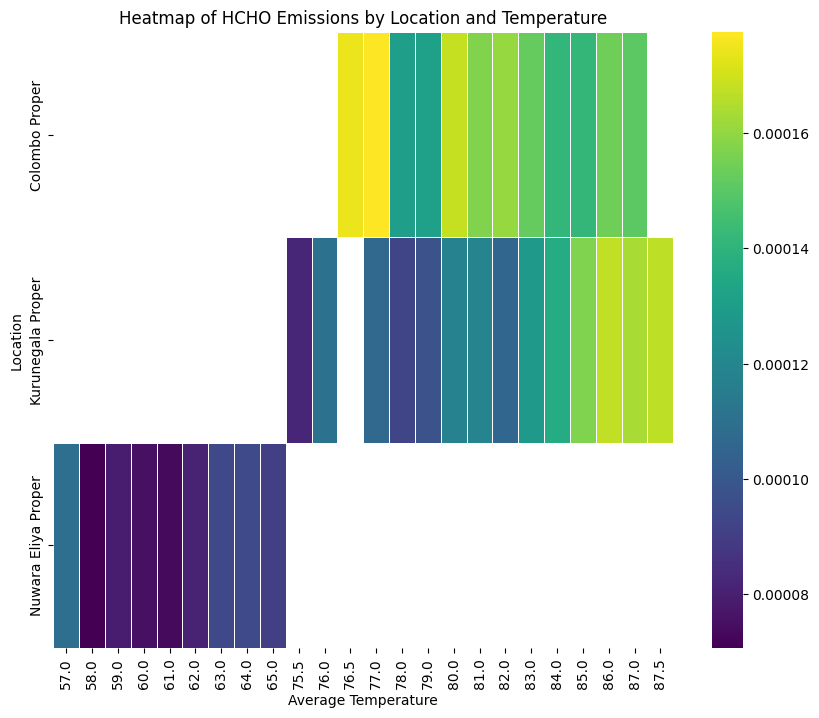

In [236]:
heatmap_data = df_merged_external.pivot_table(index='Location', columns='Temperature_avg', values='HCHO_reading')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5)

plt.xlabel('Average Temperature')
plt.ylabel('Location')
plt.title('Heatmap of HCHO Emissions by Location and Temperature')

plt.show()

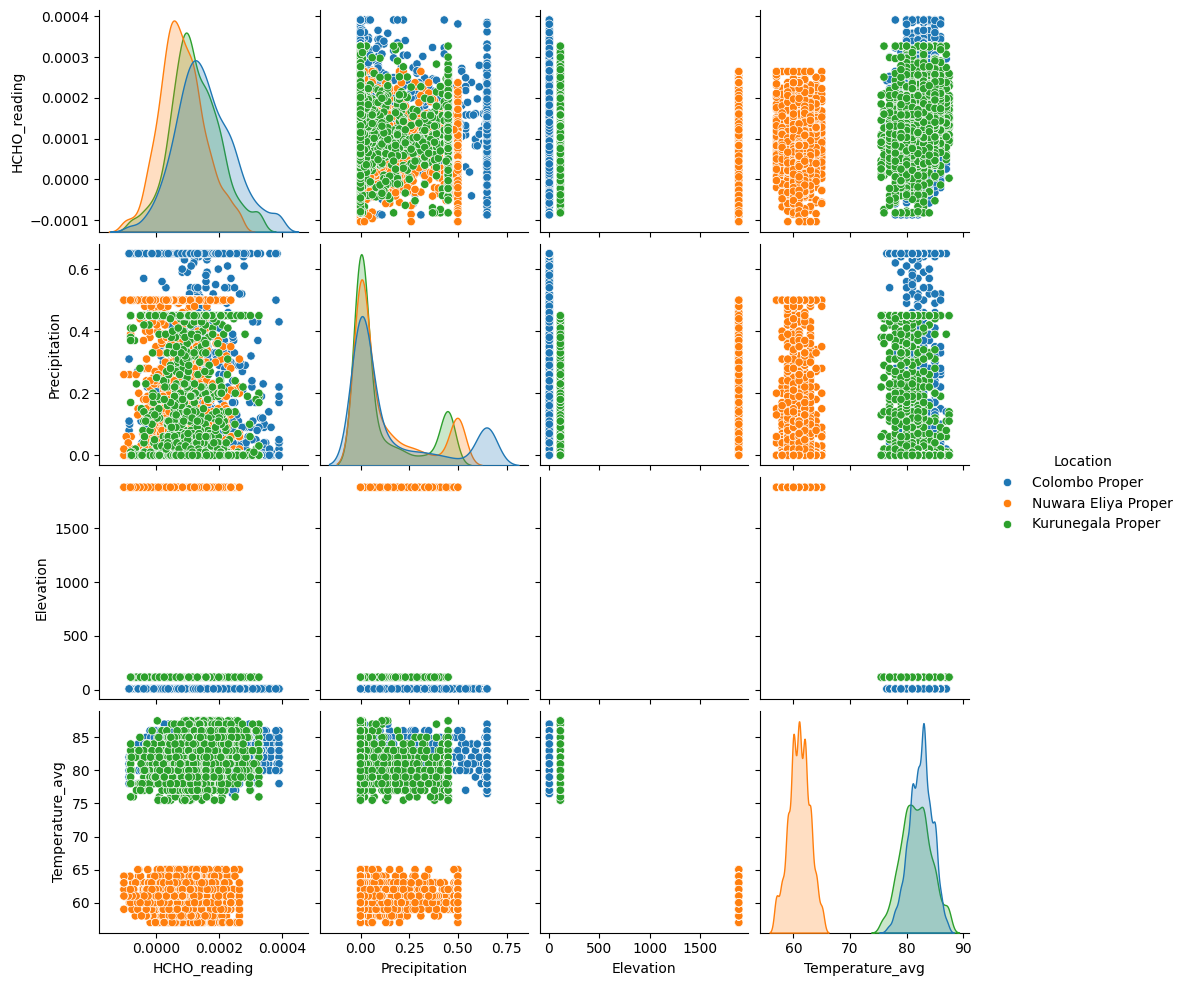

In [237]:
columns = ['Location', 'HCHO_reading', 'Precipitation', 'Elevation', 'Temperature_avg']

pairplot_data = df_merged_external[columns]

sns.pairplot(pairplot_data, hue='Location')
plt.show()

In [238]:
df_merged_external

HCHO_reading           Location Current_Date  Elevation  Precipitation  \
0         0.000263     Colombo Proper   2019-01-02        7.0           0.00   
1         0.000099     Colombo Proper   2019-01-03        7.0           0.00   
2         0.000210     Colombo Proper   2019-01-04        7.0           0.00   
3         0.000179     Colombo Proper   2019-01-05        7.0           0.00   
4         0.000108     Colombo Proper   2019-01-06        7.0           0.00   
...            ...                ...          ...        ...            ...   
5224      0.000075  Kurunegala Proper   2023-12-27      116.0           0.45   
5225      0.000103  Kurunegala Proper   2023-12-28      116.0           0.29   
5226      0.000130  Kurunegala Proper   2023-12-29      116.0           0.38   
5227      0.000158  Kurunegala Proper   2023-12-30      116.0           0.45   
5228      0.000158  Kurunegala Proper   2023-12-31      116.0           0.06   

      Temperature_avg  
0                78.0  
1                81.0  
2                81.0  
3                81.0  
4                81.0  
...               ...  
5224             81.0  
5225             79.0  
5226             77.0  
5227             80.0  
5228             79.0  

[5229 rows x 6 columns]

# **3. Machine Learning**

## SARIMA Model

In [239]:
df_model = df_sl_cities.copy()
df_model.head()

HCHO_reading        Location Current_Date  Next_Date
0      0.000263  Colombo Proper   2019-01-02 2019-01-03
1      0.000099  Colombo Proper   2019-01-03 2019-01-04
2      0.000210  Colombo Proper   2019-01-04 2019-01-05
3      0.000179  Colombo Proper   2019-01-05 2019-01-06
4      0.000108  Colombo Proper   2019-01-06 2019-01-07

In [240]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary"

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary

In [241]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
# Check for stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(result[1]) # 0.05 > x  0
    if result[1] <= 0.05:
        print("Stationary value, can select 0 as r value")
    else:
        print("Non-stationary Value can select 1 as r value")

def plot_acf_pacf(timeseries, lags=30):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(timeseries, ax=ax[0], lags=lags)
    plot_pacf(timeseries, ax=ax[1], lags=lags)
    plt.show()

## I. Colombo

### Colombo Proper Model Evaluation

In [242]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [243]:
df_colombo = df_model[df_model['Location'] == 'Colombo Proper']
print(df_colombo.shape)
df_colombo.head()

(1825, 4)


HCHO_reading        Location Current_Date  Next_Date
0      0.000263  Colombo Proper   2019-01-02 2019-01-03
1      0.000099  Colombo Proper   2019-01-03 2019-01-04
2      0.000210  Colombo Proper   2019-01-04 2019-01-05
3      0.000179  Colombo Proper   2019-01-05 2019-01-06
4      0.000108  Colombo Proper   2019-01-06 2019-01-07

In [244]:
df_colombo.drop(['Location','Next_Date'], axis=1)

HCHO_reading Current_Date
0         0.000263   2019-01-02
1         0.000099   2019-01-03
2         0.000210   2019-01-04
3         0.000179   2019-01-05
4         0.000108   2019-01-06
...            ...          ...
1820      0.000118   2023-12-27
1821      0.000125   2023-12-28
1822      0.000133   2023-12-29
1823      0.000140   2023-12-30
1824      0.000080   2023-12-31

[1825 rows x 2 columns]

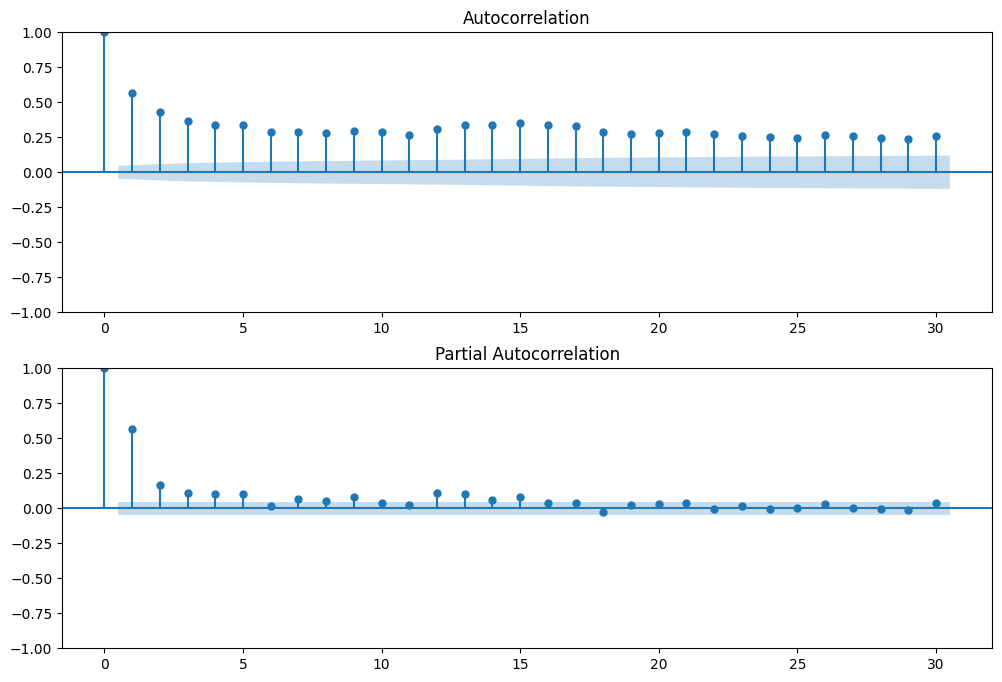

In [245]:
plot_acf_pacf(df_colombo['HCHO_reading'])

In [246]:
check_stationarity(df_colombo['HCHO_reading'])

0.0004962513480840333
Stationary value, can select 0 as r value


In [247]:
df_colombo['Current_Date'] = pd.to_datetime(df_colombo['Current_Date'])
df_colombo.sort_values(by='Current_Date', inplace=True)
df_colombo.set_index('Current_Date', inplace=True)

my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_colombo["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_colombo["HCHO_reading"][:1600])
end_i = len(df_colombo["HCHO_reading"][:1600]) + len(df_colombo["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-247-c83b476914a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombo['Current_Date'] = pd.to_datetime(df_colombo['Current_Date'])
<ipython-input-247-c83b476914a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombo.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4

### Colombo Proper Model Validation

In [248]:

mse = mean_squared_error(df_colombo["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_colombo["HCHO_reading"][1600:], predictions)
mae = mean_absolute_error(df_colombo["HCHO_reading"][1600:], predictions)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Absolute Error: 8.956935383852739e-05
Mean Squared Error: 1.139447730544901e-08
R-squared: -0.9237649190521524


In [249]:
my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_colombo["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


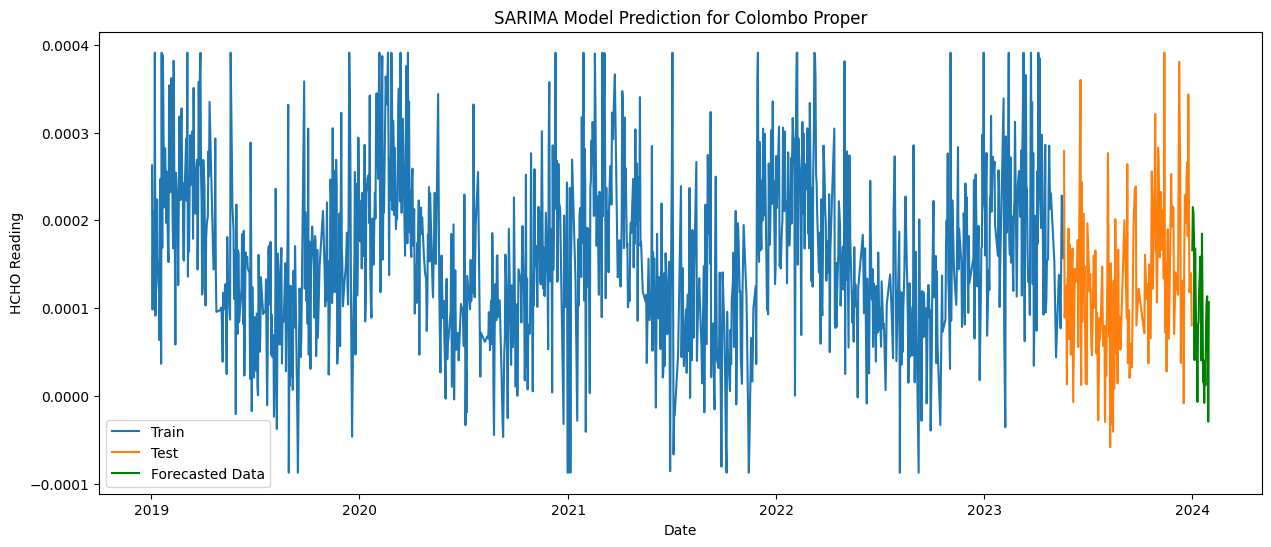

In [250]:
plt.figure(figsize=(15, 6))
plt.plot(df_colombo["HCHO_reading"][:1600].index, df_colombo["HCHO_reading"][:1600], label='Train')
plt.plot(df_colombo["HCHO_reading"][1600:].index, df_colombo["HCHO_reading"][1600:], label='Test')
#plt.plot(df_colombo["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Colombo Proper')
plt.legend()
plt.show()

## II. Deniyaya, Matara

### Deniyaya, Matara Model Evaluation

In [251]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [252]:
df_den_mat = df_model[df_model['Location'] == 'Deniyaya, Matara']
print(df_den_mat.shape)
df_den_mat.head()

(1826, 4)


HCHO_reading          Location Current_Date  Next_Date
1825      0.000080  Deniyaya, Matara   2019-01-01 2019-01-02
1826      0.000006  Deniyaya, Matara   2019-01-02 2019-01-03
1827      0.000236  Deniyaya, Matara   2019-01-03 2019-01-04
1828      0.000064  Deniyaya, Matara   2019-01-04 2019-01-05
1829      0.000053  Deniyaya, Matara   2019-01-05 2019-01-06

In [253]:
df_den_mat.drop(['Location','Next_Date'], axis=1)

HCHO_reading Current_Date
1825      0.000080   2019-01-01
1826      0.000006   2019-01-02
1827      0.000236   2019-01-03
1828      0.000064   2019-01-04
1829      0.000053   2019-01-05
...            ...          ...
3646      0.000228   2023-12-27
3647      0.000191   2023-12-28
3648      0.000153   2023-12-29
3649      0.000116   2023-12-30
3650      0.000116   2023-12-31

[1826 rows x 2 columns]

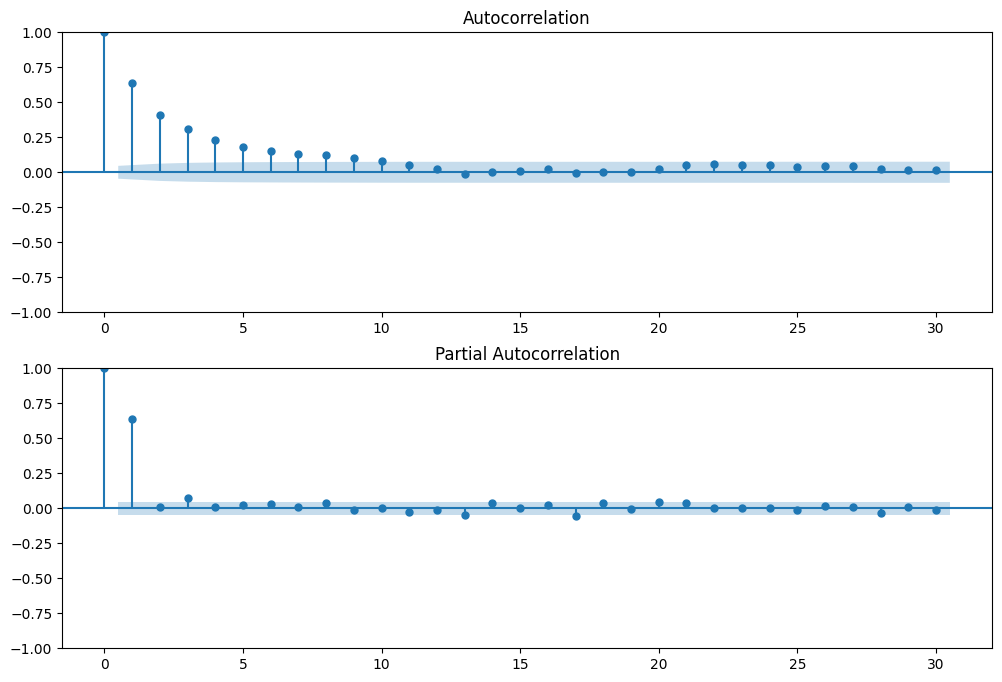

In [254]:
plot_acf_pacf(df_den_mat['HCHO_reading'])

In [255]:
check_stationarity(df_den_mat['HCHO_reading'])



3.449685469125085e-28
Stationary value, can select 0 as r value


In [256]:
df_den_mat['Current_Date'] = pd.to_datetime(df_den_mat['Current_Date'])
df_den_mat.sort_values(by='Current_Date', inplace=True)
df_den_mat.set_index('Current_Date', inplace=True)

my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_den_mat["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_den_mat["HCHO_reading"][:1600])
end_i = len(df_den_mat["HCHO_reading"][:1600]) + len(df_den_mat["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-256-ec5d726fb81d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_den_mat['Current_Date'] = pd.to_datetime(df_den_mat['Current_Date'])
<ipython-input-256-ec5d726fb81d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_den_mat.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4

### Deniyaya, Matara Model Validation

In [257]:

mse = mean_squared_error(df_den_mat["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_den_mat["HCHO_reading"][1600:], predictions)
mae = mean_absolute_error(df_den_mat["HCHO_reading"][1600:], predictions)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Absolute Error: 8.374098752775976e-05
Mean Squared Error: 1.1883119809704493e-08
R-squared: -1.3463489220036693


In [258]:
my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_den_mat["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


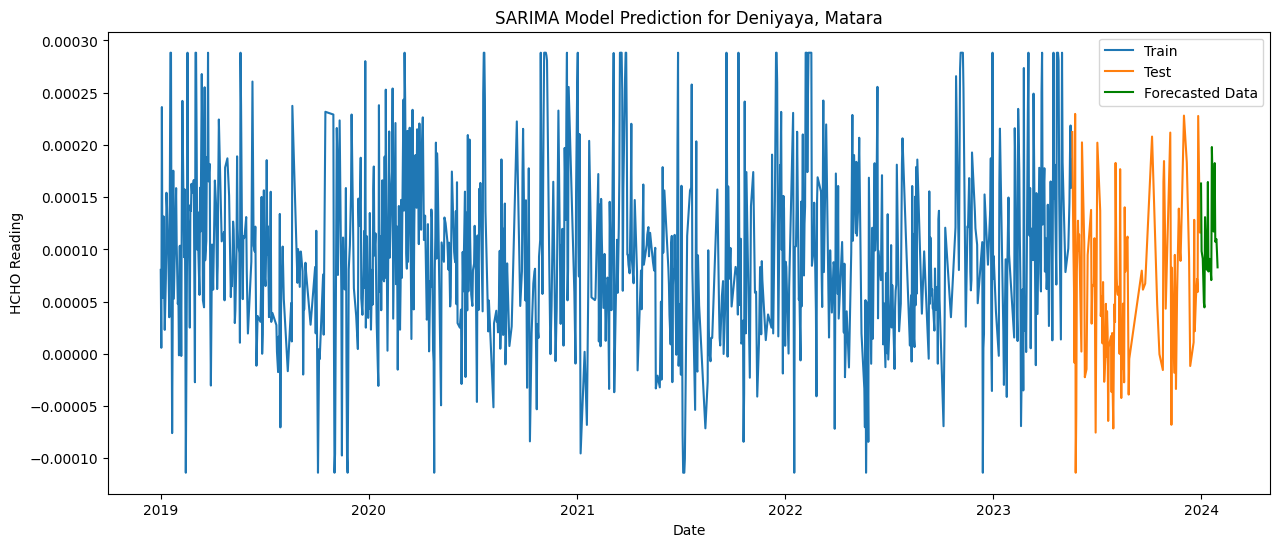

In [259]:
plt.figure(figsize=(15, 6))
plt.plot(df_den_mat["HCHO_reading"][:1600].index, df_den_mat["HCHO_reading"][:1600], label='Train')
plt.plot(df_den_mat["HCHO_reading"][1600:].index, df_den_mat["HCHO_reading"][1600:], label='Test')
#plt.plot(df_den_mat["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Deniyaya, Matara')
plt.legend()
plt.show()


## III. Nuwara Eliya

### Nuwara Eliya Proper Model Evaluation

In [260]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [261]:
df_nuw_eli = df_model[df_model['Location'] == 'Nuwara Eliya Proper']
print(df_nuw_eli.shape)
df_nuw_eli.head()

(1826, 4)


HCHO_reading             Location Current_Date  Next_Date
3651      0.000116  Nuwara Eliya Proper   2019-01-01 2019-01-02
3652      0.000116  Nuwara Eliya Proper   2019-01-02 2019-01-03
3653      0.000191  Nuwara Eliya Proper   2019-01-03 2019-01-04
3654      0.000051  Nuwara Eliya Proper   2019-01-04 2019-01-05
3655      0.000065  Nuwara Eliya Proper   2019-01-05 2019-01-06

In [262]:
df_nuw_eli.drop(['Location','Next_Date'], axis=1)

HCHO_reading Current_Date
3651      0.000116   2019-01-01
3652      0.000116   2019-01-02
3653      0.000191   2019-01-03
3654      0.000051   2019-01-04
3655      0.000065   2019-01-05
...            ...          ...
5472      0.000237   2023-12-27
5473      0.000237   2023-12-28
5474      0.000237   2023-12-29
5475      0.000237   2023-12-30
5476      0.000237   2023-12-31

[1826 rows x 2 columns]

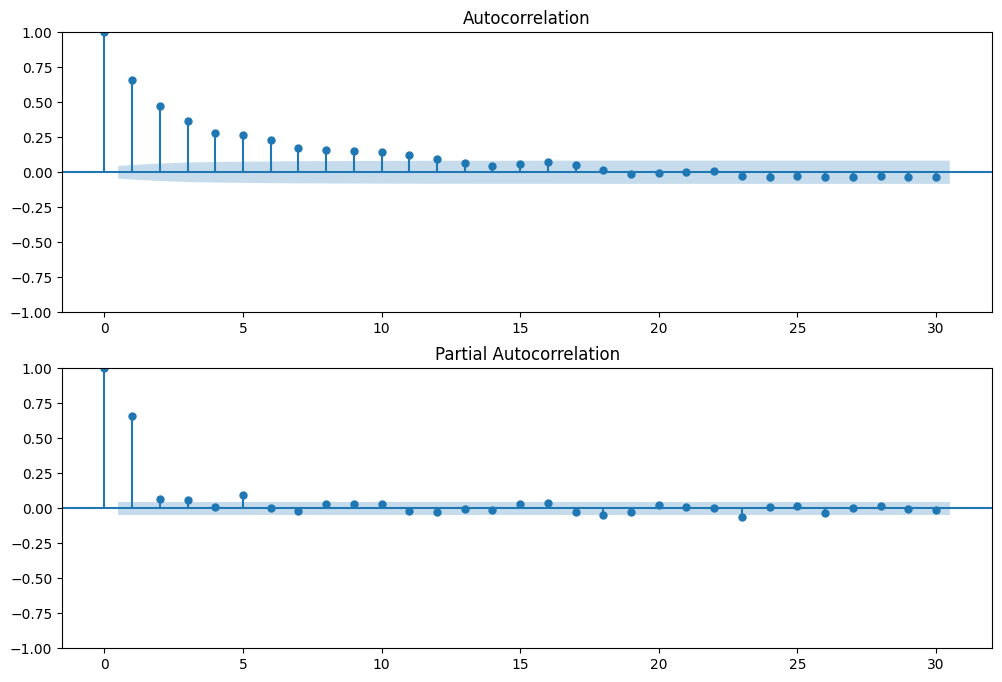

In [263]:
plot_acf_pacf(df_nuw_eli['HCHO_reading'])

In [264]:
check_stationarity(df_nuw_eli['HCHO_reading'])

2.7594932408021642e-21
Stationary value, can select 0 as r value


In [265]:
df_nuw_eli['Current_Date'] = pd.to_datetime(df_nuw_eli['Current_Date'])
df_nuw_eli.sort_values(by='Current_Date', inplace=True)
df_nuw_eli.set_index('Current_Date', inplace=True)

my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 12)
model = SARIMAX(df_nuw_eli["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_nuw_eli["HCHO_reading"][:1600])
end_i = len(df_nuw_eli["HCHO_reading"][:1600]) + len(df_nuw_eli["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-265-2c7244780c0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuw_eli['Current_Date'] = pd.to_datetime(df_nuw_eli['Current_Date'])
<ipython-input-265-2c7244780c0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuw_eli.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4

### Nuwara Eliya Proper Model Validation

In [266]:

mse = mean_squared_error(df_nuw_eli["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_nuw_eli["HCHO_reading"][1600:], predictions)
mae = mean_absolute_error(df_nuw_eli["HCHO_reading"][1600:], predictions)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Absolute Error: 8.565677917483409e-05
Mean Squared Error: 1.1833002510997487e-08
R-squared: -0.6349053466587156


In [267]:
my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 12)
model = SARIMAX(df_nuw_eli["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


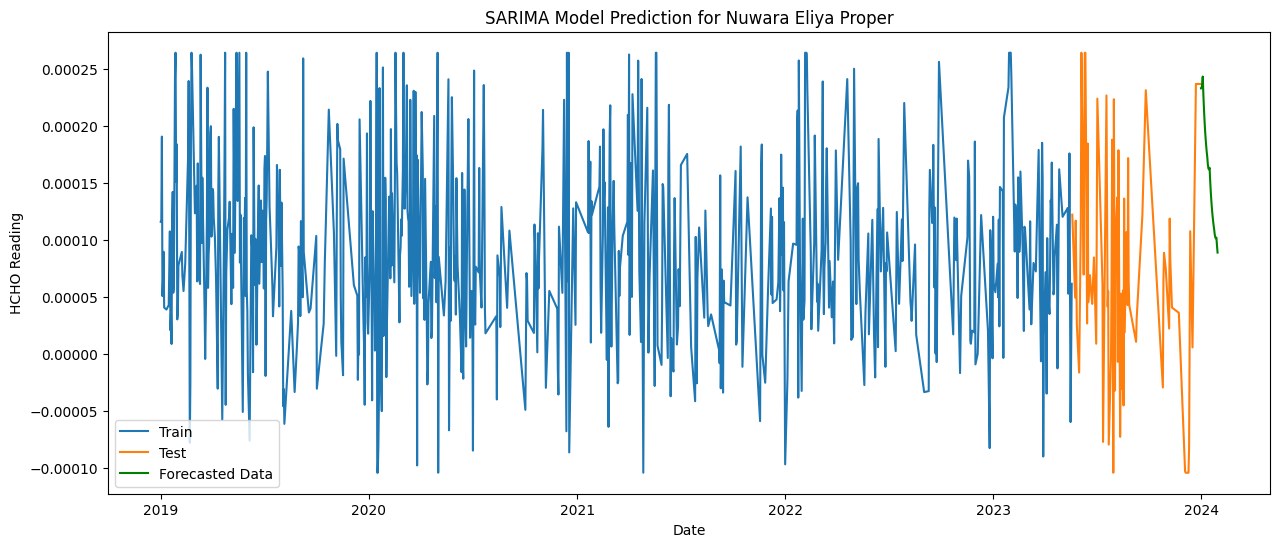

In [268]:
plt.figure(figsize=(15, 6))
plt.plot(df_nuw_eli["HCHO_reading"][:1600].index, df_nuw_eli["HCHO_reading"][:1600], label='Train')
plt.plot(df_nuw_eli["HCHO_reading"][1600:].index, df_nuw_eli["HCHO_reading"][1600:], label='Test')
#plt.plot(df_nuw_eli["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Nuwara Eliya Proper')
plt.legend()
plt.show()


## IV. Kandy

### Kandy Proper Model Evaluation

In [269]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [270]:
df_kan = df_model[df_model['Location'] == 'Kandy Proper']
print(df_kan.shape)
df_kan.head()

(1825, 4)


HCHO_reading      Location Current_Date  Next_Date
5477      0.000092  Kandy Proper   2019-01-02 2019-01-03
5478      0.000142  Kandy Proper   2019-01-03 2019-01-04
5479      0.000191  Kandy Proper   2019-01-04 2019-01-05
5480      0.000122  Kandy Proper   2019-01-05 2019-01-06
5481     -0.000065  Kandy Proper   2019-01-06 2019-01-07

In [271]:
df_kan.drop(['Location','Next_Date'], axis=1)

HCHO_reading Current_Date
5477      0.000092   2019-01-02
5478      0.000142   2019-01-03
5479      0.000191   2019-01-04
5480      0.000122   2019-01-05
5481     -0.000065   2019-01-06
...            ...          ...
7297      0.000082   2023-12-27
7298      0.000073   2023-12-28
7299      0.000065   2023-12-29
7300      0.000056   2023-12-30
7301      0.000056   2023-12-31

[1825 rows x 2 columns]

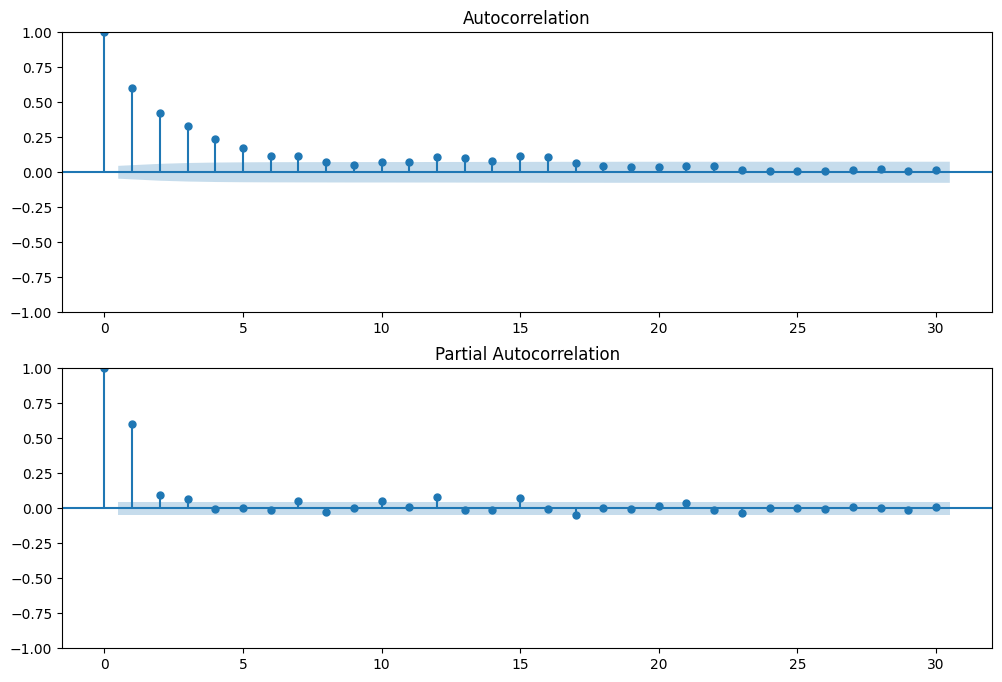

In [272]:
plot_acf_pacf(df_kan['HCHO_reading'])

In [273]:
check_stationarity(df_kan['HCHO_reading'])

1.5495534070815951e-12
Stationary value, can select 0 as r value


In [274]:
df_kan['Current_Date'] = pd.to_datetime(df_kan['Current_Date'])
df_kan.sort_values(by='Current_Date', inplace=True)
df_kan.set_index('Current_Date', inplace=True)

my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 12)
model = SARIMAX(df_kan["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_kan["HCHO_reading"][:1600])
end_i = len(df_kan["HCHO_reading"][:1600]) + len(df_kan["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-274-318ab6b022e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kan['Current_Date'] = pd.to_datetime(df_kan['Current_Date'])
<ipython-input-274-318ab6b022e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kan.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWar

### Kandy Proper Model Validation

In [275]:

mse = mean_squared_error(df_kan["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_kan["HCHO_reading"][1600:], predictions)
mae = mean_absolute_error(df_kan["HCHO_reading"][1600:], predictions)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Absolute Error: 8.306386743900522e-05
Mean Squared Error: 9.99249300192882e-09
R-squared: -1.0823551701630088


In [276]:

my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 12)
model = SARIMAX(df_kan["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


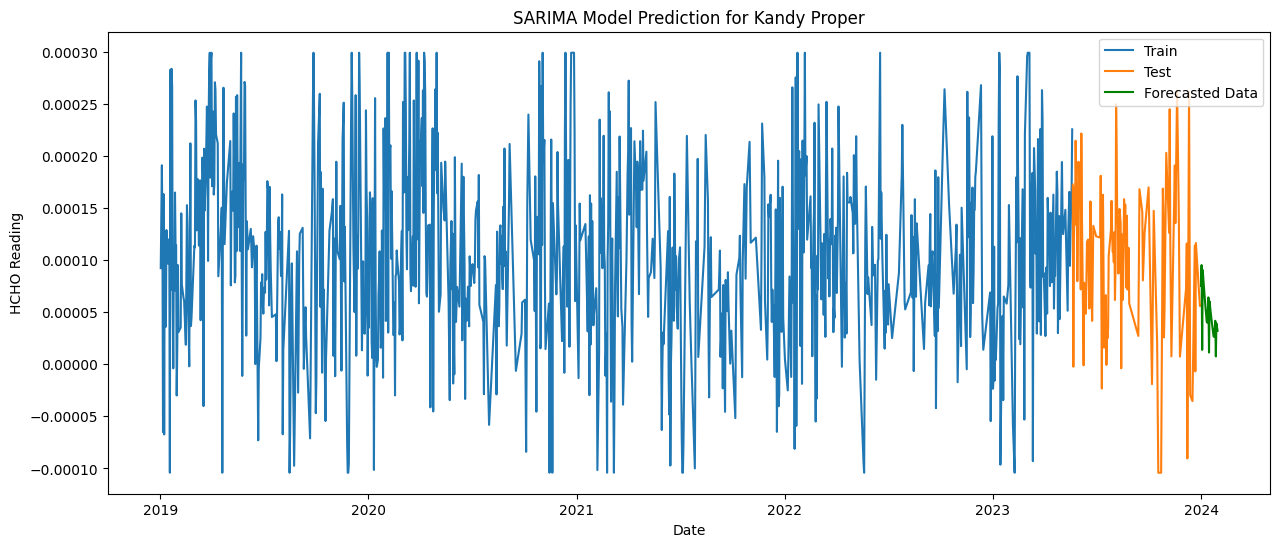

In [277]:
plt.figure(figsize=(15, 6))
plt.plot(df_kan["HCHO_reading"][:1600].index, df_kan["HCHO_reading"][:1600], label='Train')
plt.plot(df_kan["HCHO_reading"][1600:].index, df_kan["HCHO_reading"][1600:], label='Test')
#plt.plot(df_kan["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Kandy Proper')
plt.legend()
plt.show()


## V. Bibile, Monaragala

### Bibile, Monaragala Model Evaluation

In [278]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [279]:
df_bib_mon = df_model[df_model['Location'] == 'Bibile, Monaragala']
print(df_bib_mon.shape)
df_bib_mon.head()

(1825, 4)


HCHO_reading            Location Current_Date  Next_Date
7302      0.000019  Bibile, Monaragala   2019-01-02 2019-01-03
7303      0.000028  Bibile, Monaragala   2019-01-03 2019-01-04
7304      0.000037  Bibile, Monaragala   2019-01-04 2019-01-05
7305     -0.000018  Bibile, Monaragala   2019-01-05 2019-01-06
7306      0.000146  Bibile, Monaragala   2019-01-06 2019-01-07

In [280]:
df_bib_mon.drop(['Location','Next_Date'], axis=1)

HCHO_reading Current_Date
7302      0.000019   2019-01-02
7303      0.000028   2019-01-03
7304      0.000037   2019-01-04
7305     -0.000018   2019-01-05
7306      0.000146   2019-01-06
...            ...          ...
9122      0.000031   2023-12-27
9123      0.000031   2023-12-28
9124      0.000031   2023-12-29
9125      0.000031   2023-12-30
9126      0.000031   2023-12-31

[1825 rows x 2 columns]

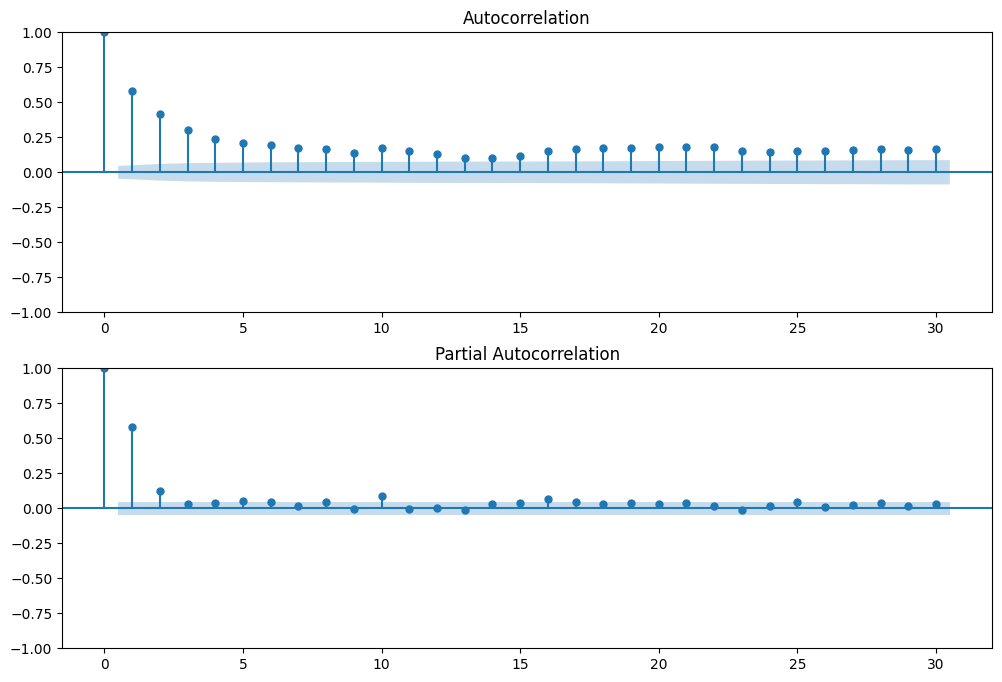

In [281]:
plot_acf_pacf(df_bib_mon['HCHO_reading'])

In [282]:
check_stationarity(df_bib_mon['HCHO_reading'])

3.0086103831109045e-06
Stationary value, can select 0 as r value


In [283]:
df_bib_mon['Current_Date'] = pd.to_datetime(df_bib_mon['Current_Date'])
df_bib_mon.sort_values(by='Current_Date', inplace=True)
df_bib_mon.set_index('Current_Date', inplace=True)

my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 12)
model = SARIMAX(df_bib_mon["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_bib_mon["HCHO_reading"][:1600])
end_i = len(df_bib_mon["HCHO_reading"][:1600]) + len(df_bib_mon["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-283-988e860b7fa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bib_mon['Current_Date'] = pd.to_datetime(df_bib_mon['Current_Date'])
<ipython-input-283-988e860b7fa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bib_mon.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4

### Bibile, Monaragala Model Validation

In [284]:

mse = mean_squared_error(df_bib_mon["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_bib_mon["HCHO_reading"][1600:], predictions)
mae = mean_absolute_error(df_bib_mon["HCHO_reading"][1600:], predictions)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Absolute Error: 0.00012540759818217774
Mean Squared Error: 2.2121667595336827e-08
R-squared: -1.7829262229353802


In [285]:
my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 12)
model = SARIMAX(df_bib_mon["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


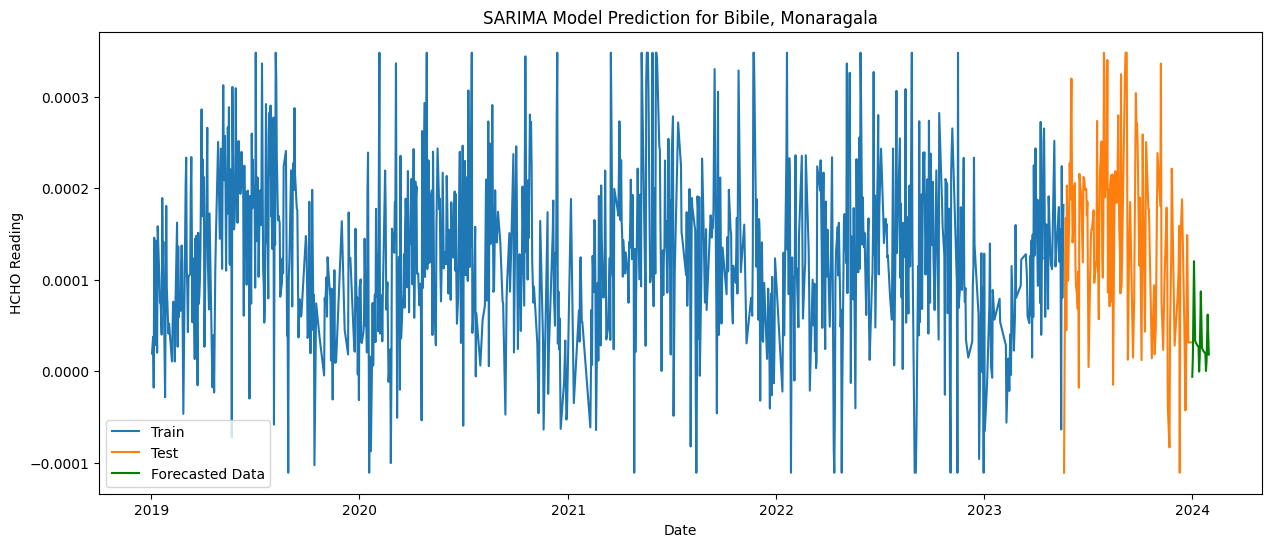

In [286]:
plt.figure(figsize=(15, 6))
plt.plot(df_bib_mon["HCHO_reading"][:1600].index, df_bib_mon["HCHO_reading"][:1600], label='Train')
plt.plot(df_bib_mon["HCHO_reading"][1600:].index, df_bib_mon["HCHO_reading"][1600:], label='Test')
#plt.plot(df_bib_mon["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Bibile, Monaragala')
plt.legend()
plt.show()

## VI. Kurunegala

### Kurunegala Proper Model Evaluation

In [287]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [288]:
df_kur = df_model[df_model['Location'] == 'Kurunegala Proper']
print(df_kur.shape)
df_kur.head()

(1826, 4)


HCHO_reading           Location Current_Date  Next_Date
9127      0.000088  Kurunegala Proper   2019-01-01 2019-01-02
9128      0.000137  Kurunegala Proper   2019-01-02 2019-01-03
9129      0.000148  Kurunegala Proper   2019-01-03 2019-01-04
9130     -0.000002  Kurunegala Proper   2019-01-04 2019-01-05
9131      0.000249  Kurunegala Proper   2019-01-05 2019-01-06

In [289]:
df_kur.drop(['Location','Next_Date'], axis=1)

HCHO_reading Current_Date
9127       0.000088   2019-01-01
9128       0.000137   2019-01-02
9129       0.000148   2019-01-03
9130      -0.000002   2019-01-04
9131       0.000249   2019-01-05
...             ...          ...
10948      0.000075   2023-12-27
10949      0.000103   2023-12-28
10950      0.000130   2023-12-29
10951      0.000158   2023-12-30
10952      0.000158   2023-12-31

[1826 rows x 2 columns]

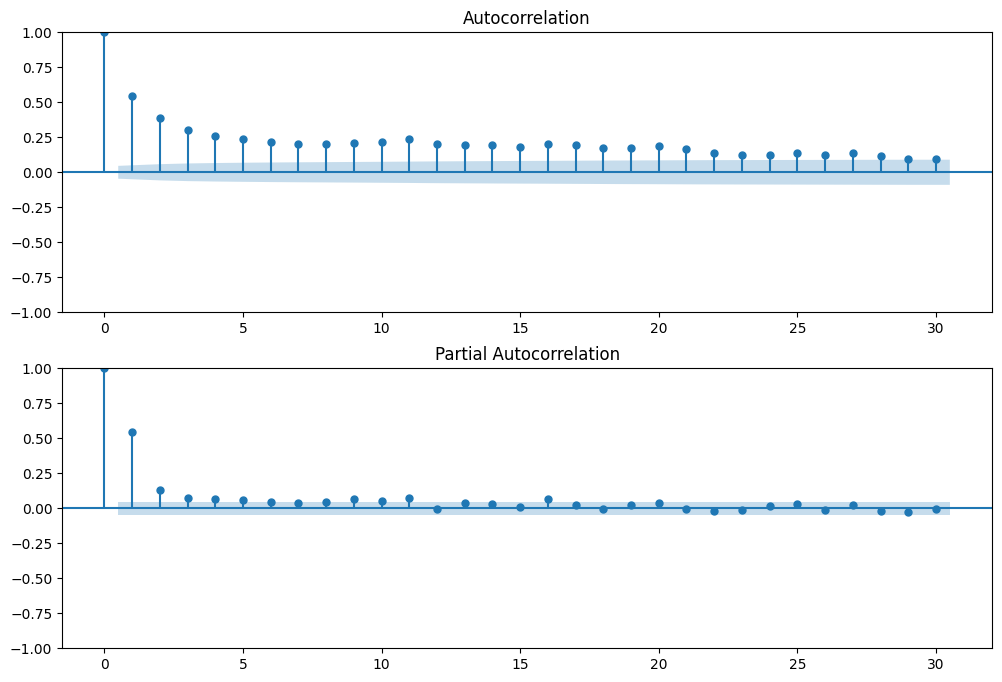

In [290]:
plot_acf_pacf(df_kur['HCHO_reading'])

In [291]:
check_stationarity(df_kur['HCHO_reading'])

1.1562728300935907e-07
Stationary value, can select 0 as r value


In [292]:
df_kur['Current_Date'] = pd.to_datetime(df_kur['Current_Date'])
df_kur.sort_values(by='Current_Date', inplace=True)
df_kur.set_index('Current_Date', inplace=True)

my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 12)
model = SARIMAX(df_kur["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_kur["HCHO_reading"][:1600])
end_i = len(df_kur["HCHO_reading"][:1600]) + len(df_kur["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-292-deb67a878683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kur['Current_Date'] = pd.to_datetime(df_kur['Current_Date'])
<ipython-input-292-deb67a878683>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kur.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWar

### Kurunegala Proper Model Validation

In [293]:
mse = mean_squared_error(df_kur["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_kur["HCHO_reading"][1600:], predictions)
mae = mean_absolute_error(df_kur["HCHO_reading"][1600:], predictions)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Absolute Error: 8.459661744483281e-05
Mean Squared Error: 1.1117489816271597e-08
R-squared: -1.223981686930046


In [294]:
my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 12)
model = SARIMAX(df_kur["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


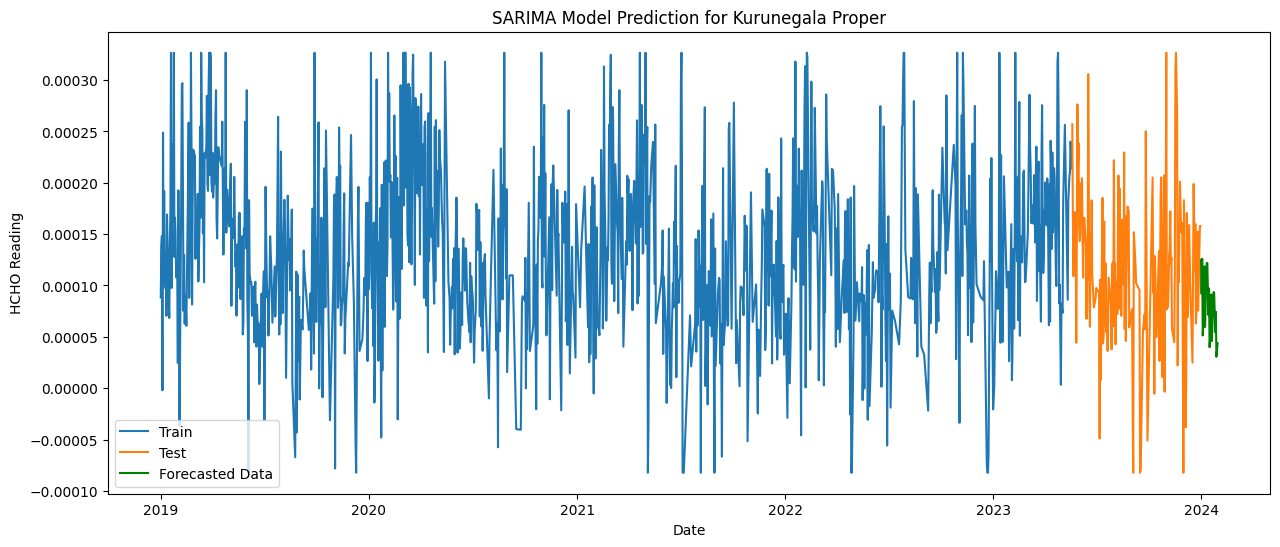

In [295]:
plt.figure(figsize=(15, 6))
plt.plot(df_kur["HCHO_reading"][:1600].index, df_kur["HCHO_reading"][:1600], label='Train')
plt.plot(df_kur["HCHO_reading"][1600:].index, df_kur["HCHO_reading"][1600:], label='Test')
#plt.plot(df_kur["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Kurunegala Proper')
plt.legend()
plt.show()

## VII. Jaffna

### Jaffna Proper Model Evaluation

In [296]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [297]:
df_jaf = df_model[df_model['Location'] == 'Jaffna Proper']
print(df_jaf.shape)
df_jaf.head()

(1826, 4)


HCHO_reading       Location Current_Date  Next_Date
10953      0.000058  Jaffna Proper   2019-01-01 2019-01-02
10954      0.000102  Jaffna Proper   2019-01-02 2019-01-03
10955      0.000039  Jaffna Proper   2019-01-03 2019-01-04
10956     -0.000002  Jaffna Proper   2019-01-04 2019-01-05
10957      0.000159  Jaffna Proper   2019-01-05 2019-01-06

In [298]:
df_jaf.drop(['Location','Next_Date'], axis=1)

HCHO_reading Current_Date
10953      0.000058   2019-01-01
10954      0.000102   2019-01-02
10955      0.000039   2019-01-03
10956     -0.000002   2019-01-04
10957      0.000159   2019-01-05
...             ...          ...
12774      0.000026   2023-12-27
12775      0.000051   2023-12-28
12776      0.000127   2023-12-29
12777      0.000117   2023-12-30
12778      0.000065   2023-12-31

[1826 rows x 2 columns]

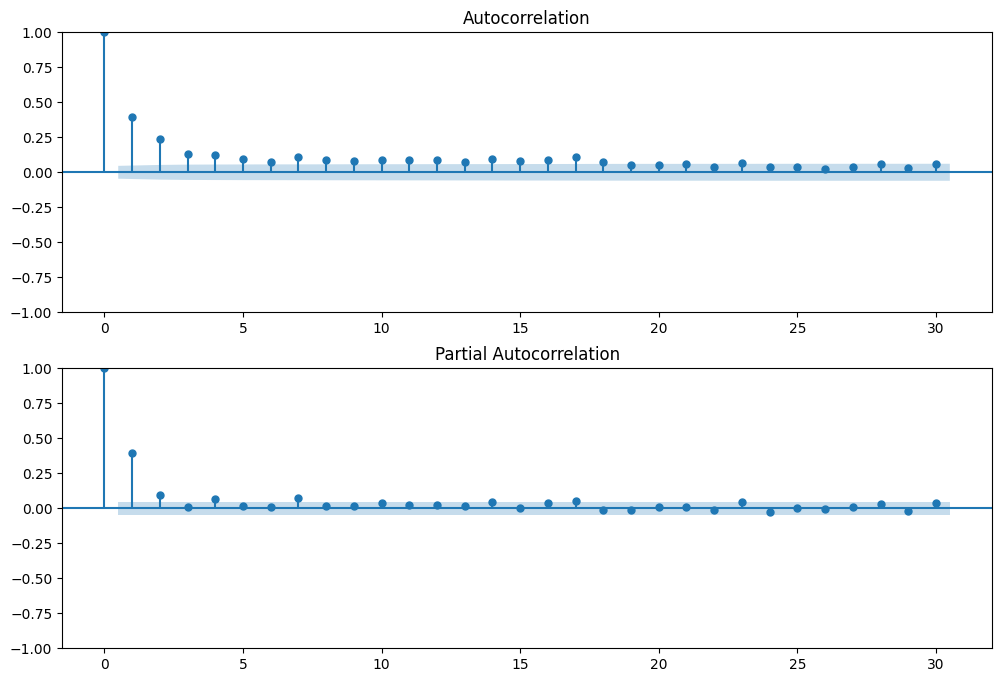

In [299]:
plot_acf_pacf(df_jaf['HCHO_reading'])

In [300]:
check_stationarity(df_jaf['HCHO_reading'])

1.1400671881928818e-22
Stationary value, can select 0 as r value


In [301]:
df_jaf['Current_Date'] = pd.to_datetime(df_jaf['Current_Date'])
df_jaf.sort_values(by='Current_Date', inplace=True)
df_jaf.set_index('Current_Date', inplace=True)

my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_jaf["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_jaf["HCHO_reading"][:1600])
end_i = len(df_jaf["HCHO_reading"][:1600]) + len(df_jaf["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-301-b6de7847e668>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaf['Current_Date'] = pd.to_datetime(df_jaf['Current_Date'])
<ipython-input-301-b6de7847e668>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaf.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWar

### Jaffna Proper Model Validation

In [302]:

mse = mean_squared_error(df_jaf["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_jaf["HCHO_reading"][1600:], predictions)
mae = mean_absolute_error(df_jaf["HCHO_reading"][1600:], predictions)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Absolute Error: 5.7699743216433456e-05
Mean Squared Error: 5.423908293269814e-09
R-squared: -0.3564158998281861


In [303]:
my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_jaf["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


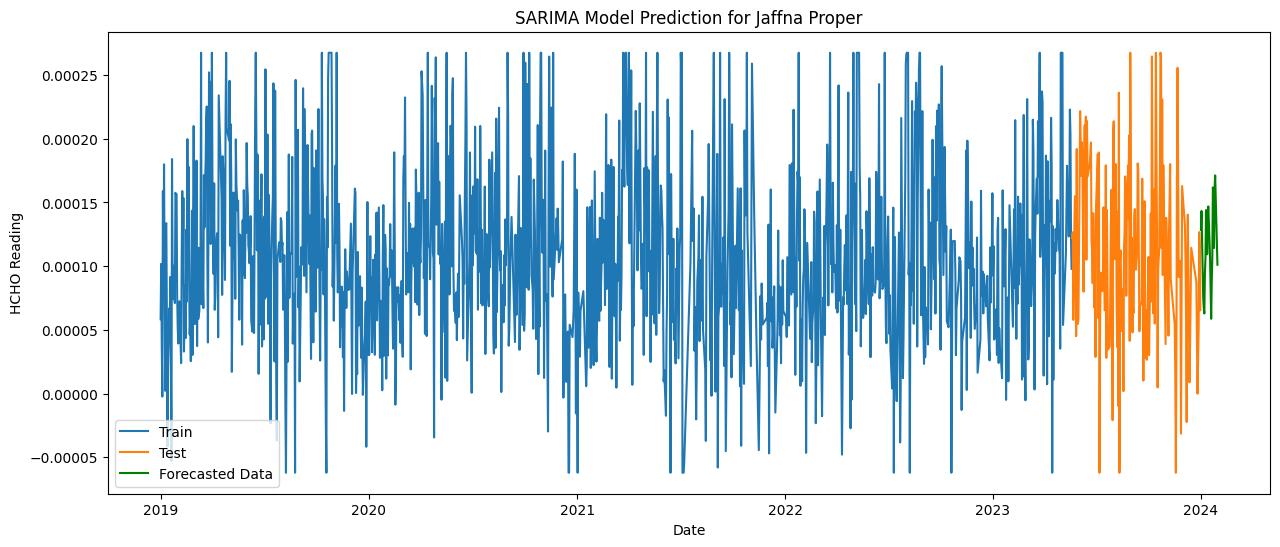

In [304]:
plt.figure(figsize=(15, 6))
plt.plot(df_jaf["HCHO_reading"][:1600].index, df_jaf["HCHO_reading"][:1600], label='Train')
plt.plot(df_jaf["HCHO_reading"][1600:].index, df_jaf["HCHO_reading"][1600:], label='Test')
#plt.plot(df_jaf["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Jaffna Proper')
plt.legend()
plt.show()